## <font color='lightblue'> <h1><b>Desafio  Final:</b> "Análisis de la Demanda de Energía Eléctrica en Londres"</h1> </font>
## </h3> (A partir del datos suministrados por SmartMeters) </h3>
<h3><blockquote>
        <ul>
          <li>Análisis de demanda y patrones de consumo </li>
          <li>Identificación de features representativas del comportamiento de la demanda </li>
          <li>Análisis de la demanda como serie de tiempo en modelos predictivos </li>
        </ul>
</blockquote>

<img src=https://www.wannapik.com/media/W1siZiIsIjIwMTYvMDgvMjIvOW95M3V4MGdybF81dm5nNjJ6bmNrX2VudmkwMDI0LnBuZyJdXQ/60d70353518b92e1/5vng62znck_envi0024.png>

 <font color='lightgreen'> <h2><b>Grupo 5</b></h2> </font>
<blockquote>
        <ul>
          <li>Panizza, Camila</li>
          <li>Ron, Juan Ignacio</li>
          <li>Sirai, Juan Bautista</li>
        </ul>
</blockquote>

<a id="section_toc"></a> 
##### <font color='lightgreen'> <h2><b> Contenidos</b></h2> </font>

$\hspace{.5cm}$[Introducción](#section_intro)

[1. Carga de Librerías](#section_carga_librerias)

[2. Carga de Datos](#section_carga_datasets)

[3. Data Wrangling](#section_data_wrangling)

[4. Selección de la muestra (block)](#section_carga_clientes)

[5. Train-Test Split, normalización y encoding](#section_traintest)

[6. Estimación de la demanda por hora](#section_ml)

$\hspace{.5cm}$[6.1. Modelos Lineales](#section_linear)

$\hspace{1cm}$[6.1.1. Baseline - Regresión Lineal](#section_rl)

$\hspace{1cm}$[6.1.2. Regresión Lasso](#section_lasso)

$\hspace{1cm}$[6.1.3. Regresión Ridge](#section_ridge)

$\hspace{1cm}$[6.1.4. Elastic-net](#section_elastic)

$\hspace{1cm}$[6.1.5. Statsmodels OLS](#section_ols)

$\hspace{1cm}$[6.1.6. Modelo lineal óptimo + PCA](#section_pca)

$\hspace{1cm}$[6.1.7. Modelo lineal óptimo + RFE](#section_rfe)

$\hspace{.5cm}$[6.2. Modelo de K-vecinos](#section_knr)

$\hspace{1cm}$[6.2.1. Con optimización por GridSearch y sobre el total de features](#section_knr1)

$\hspace{1cm}$[6.2.2. Con optimización por GridSearch + PCA](#section_knr2)

$\hspace{.5cm}$[6.3. Modelos de árbol](#section_trees)

$\hspace{1cm}$[6.3.1. Bagging](#section_bagging)

$\hspace{1cm}$[6.3.2. Random Forest](#section_randomforest)

$\hspace{1cm}$[6.3.3. ExtraTrees](#section_extra)

$\hspace{1cm}$[6.3.4. Gradient Boosting](#section_gradient)

$\hspace{1cm}$[6.3.5. AdaBoost](#section_ada)

$\hspace{1cm}$[6.3.6. LightGBM](#section_lgbm)

$\hspace{1cm}$[6.3.7. CatBoost](#section_cat)

$\hspace{.5cm}$[6.4. Resumen de Resultados](#section_summary)

$\hspace{.5cm}$[6.5. Feature Importance](#section_featimp)

[7. Uso del modelo para predecir nuevos datos](#section_amp)

$\hspace{.5cm}$[7.1. 'Block' al azar](#section_random)

$\hspace{.5cm}$[7.2. 'Block' dentro del mismo cluster de consumo](#section_same)

$\hspace{.5cm}$[7.3. Comparativa](#section_compare)

[8. BONUS TRACK: Interpretabilidad del Modelo - LIME](#section_lime)

---

<a id="section_intro"></a> 

# <font color='skyblue'>Introducción </font>
[Volver](#section_toc)

## Descripción del problema.
Trabajaremos sobre un Dataset de **consumo de energía eléctrica** de la ciudad de **Londes**.

Para seguir mejor el consumo de energía, el gobierno de UK quiere que las empresas prestatarias del servicio eléctrico instalen **medidores inteligentes** en todos los hogares de Inglaterra, Gales y Escocia. El objetivo es que cada uno de los 26 millones de hogares, tenga instalado un Medidor Inteligente (indistintamente lo denominaremos como SmartMeter)

Esta iniciativa, está enmarcada en un conjunto de acciones liderada por la **Union Europea** para hacer un uso más eficiente de energía y combatir el cambio climático.


### HalfHourly Dataset
En esta carpeta encontramos un archivo .csv para cada una de las 111 manzanas que fueron parte del estudio. Cada .cvs contiene los datos del consumo de cada suministro, registrados cada mdia hora, entre noviembre de 2011 y febrero 2014. Contamos con más de 5.000 suministros registrados.

* ``LCLid``: Identificador único del punto de medición.
* ``tstp``: día y hora de la medición.
* ``energy``: consumo registrado.

### Informations Households
Contiene los datos específicos de cada suministro.

* ``LCLid``: Identificador único del punto de medición.
* ``day``: día de la medición.
* ``stdor / ToU``: Tarifa estándar o por hora de uso (Time of Use).
* ``Acorn``: Es una segmentación geodemográfica para residentes de UK. Clasifican cada codigo postal del país en 62 categorías, las cuales se pueden resumir en 18 grupos, que pueden a su vez englobarse dentro de 6 categorías mayores.
* ``Acorn Grouped``: categoría mayor a la que corresponde cada Acorn.
* ``file``: refiere al Block (o manzana) a la cual pertenece

|Acorn Grouped|Acorn|Population (2013)| % Total|
|-------------|-----|-----------------|--------|
|Affluent Achievers|Lavish Lifestyles|820,947|1.3%|
|           |Executive Wealth|7,788,972|12.1%|
|           |Mature Money|5,663,939|8.8%|
|Rising Prosperity| City Sophisticates|2,024,721|3.2%|
|                 |Career Climbers|3,579,716|5.6%|
|Comfortable Communities|Countryside Communities|4,160,615|6.5%|
|                       |Successful Suburbs|3,844,002|6.0%|
|                       |Steady Neighbourhoods|5,376,958|8.4%|
|                       |Comfortable Seniors|1,645,668|2.6%|
|                       |Starting Out|2,569,813|4.0%|
|Financially Stretched|Student Life|1,550,112|2.4%|
|                     |Modest Means|5,078,729|7.9%|
|                     |Striving Families|5,564,601|8.7%|
|                     |Poorer Pensioners|3,128,512|4.9%|
|Urban Adversity|Young Hardship|3,222,867|5.0%|
|               |Struggling Estates|4,730,766|7.4%|
|               |Difficult Circumstances|2,962,375|4.6%|
|Not Private Households|Not Private Households|550,486|0.9%|
|``TOTAL``| |``64,263,799``|``100%``|

### Weather Hourly (solo principales)
Contiene información por día y hora de las principales variables climáticas.

* ``temperaturelow/min/high/Max``: Temperatura
* ``windBearing``: Dirección del viento.
* ``dewPoint``: Concepto relacionado con humedad. Temperatura a la que se debe enfriar el aire para lograr una humedad del 100%
* ``cloudCover``: Nubosidad
* ``windSpeed``: Velocidad del viento
* ``pressure``: Presion 
* ``apparentTemperatureHigh/low/max``: Sensación térmica
* ``visibility``: Visibilidad
* ``uvIndex``: indice UV
* ``moonPhase``: Fase Lunar
    
### Campos de UK Bank Holidays
* ``Bank holiday``: Fecha de feriado
* ``type``:  Descripción de feriado.



_____________________________________________

<a id="section_carga_librerias"></a> 

# <font color='skyblue'>1. Carga de Librerias</font>

[Volver](#section_toc)

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
#!pip install lightgbm
#!pip install catboost
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

import statsmodels.api as sm

from scipy import stats
from statistics import mode

from sklearn.decomposition import PCA

#!pip install lime
from lime.lime_tabular import LimeTabularExplainer

##########
import warnings
warnings.filterwarnings('ignore')

_____________________________________________

<a id="section_carga_datasets"></a> 

# <font color='skyblue'>2. Carga de DataSets</font>

[Volver](#section_toc)

#### A continuación, realizaremos la carga del dataset que nos proporciona información relativa a cada suministro (o punto de medición)

In [2]:
# Dataset de información por cada medidor
info_df = pd.read_csv('data/informations_households.csv')
print('\x1b[1;31m' +'Dataset Información Básica de cada Medidor'+'\x1b[0m')
print('Shape inicial ', info_df.shape)
print('Valores nulos en el dataset: ')
info_df.isnull().sum()

Dataset Información Básica de cada Medidor
Shape inicial  (5566, 5)
Valores nulos en el dataset: 


LCLid            0
stdorToU         0
Acorn            0
Acorn_grouped    0
file             0
dtype: int64

In [3]:
print('\x1b[1;31m' +'Muestra de los primeros 5 registros'+'\x1b[0m')
display(info_df.sample(5))
print('----------------------------------------------')
print('\x1b[1;31m' +'Tipo de datos del DataFrame'+'\x1b[0m')
print(info_df.info())

Muestra de los primeros 5 registros


,LCLid,stdorToU,Acorn,Acorn_grouped,file
161,MAC003173,Std,ACORN-B,Affluent,block_3
3302,MAC003699,Std,ACORN-H,Comfortable,block_66
963,MAC002436,Std,ACORN-E,Affluent,block_19
1750,MAC004159,ToU,ACORN-E,Affluent,block_35
4431,MAC004414,Std,ACORN-N,Adversity,block_88


----------------------------------------------
Tipo de datos del DataFrame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5566 entries, 0 to 5565
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   LCLid          5566 non-null   object
 1   stdorToU       5566 non-null   object
 2   Acorn          5566 non-null   object
 3   Acorn_grouped  5566 non-null   object
 4   file           5566 non-null   object
dtypes: object(5)
memory usage: 217.5+ KB
None


#### Cargamos DataFrame con condiciones climáticas para el período de referencia

In [4]:
# Dataset de climas
weather= pd.read_csv('data/weather_hourly_darksky.csv')
print('\x1b[1;31m' +'Dataset Temperaturas Diarias Londres'+'\x1b[0m')
print('Shape inicial ', weather.shape)
print('Valores nulos en el dataset: ')
print(weather.isnull().sum())


Dataset Temperaturas Diarias Londres
Shape inicial  (21165, 12)
Valores nulos en el dataset: 
visibility              0
windBearing             0
temperature             0
time                    0
dewPoint                0
pressure               13
apparentTemperature     0
windSpeed               0
precipType              0
icon                    0
humidity                0
summary                 0
dtype: int64


In [5]:
print('\x1b[1;31m' +'Muestra de los primeros 5 registros'+'\x1b[0m')
display(weather.head(5))
print('------------------------------------------------------------')
print('\x1b[1;31m' +'Tipo de datos'+'\x1b[0m')
print(weather.info())

Muestra de los primeros 5 registros


,visibility,windBearing,temperature,time,dewPoint,pressure,apparentTemperature,windSpeed,precipType,icon,humidity,summary
0,5.97,104,10.24,2011-11-11 00:00:00,8.86,1016.76,10.24,2.77,rain,partly-cloudy-night,0.91,Partly Cloudy
1,4.88,99,9.76,2011-11-11 01:00:00,8.83,1016.63,8.24,2.95,rain,partly-cloudy-night,0.94,Partly Cloudy
2,3.70,98,9.46,2011-11-11 02:00:00,8.79,1016.36,7.76,3.17,rain,partly-cloudy-night,0.96,Partly Cloudy
3,3.12,99,9.23,2011-11-11 03:00:00,8.63,1016.28,7.44,3.25,rain,fog,0.96,Foggy
4,1.85,111,9.26,2011-11-11 04:00:00,9.21,1015.98,7.24,3.70,rain,fog,1.00,Foggy


------------------------------------------------------------
Tipo de datos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21165 entries, 0 to 21164
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   visibility           21165 non-null  float64
 1   windBearing          21165 non-null  int64  
 2   temperature          21165 non-null  float64
 3   time                 21165 non-null  object 
 4   dewPoint             21165 non-null  float64
 5   pressure             21152 non-null  float64
 6   apparentTemperature  21165 non-null  float64
 7   windSpeed            21165 non-null  float64
 8   precipType           21165 non-null  object 
 9   icon                 21165 non-null  object 
 10  humidity             21165 non-null  float64
 11  summary              21165 non-null  object 
dtypes: float64(7), int64(1), object(4)
memory usage: 1.9+ MB
None


#### Cargamos DataFrame con los feriados bancarios para el período de referencia

In [6]:
# Dataset de feriados bancarios

holidays= pd.read_csv('data/uk_bank_holidays.csv')
print('\x1b[1;31m' +'Dataset Feriados UK'+'\x1b[0m')
print('Shape inicial ', holidays.shape)
print('Valores nulos en el dataset: ')
holidays.isnull().sum()

Dataset Feriados UK
Shape inicial  (25, 2)
Valores nulos en el dataset: 


Bank holidays    0
Type             0
dtype: int64

In [7]:
print('\x1b[1;31m' +'Muestra de los primeros 5 registros'+'\x1b[0m')
display(holidays.head(5))
print('------------------------------------------------------------')
print('\x1b[1;31m' +'Tipo de datos'+'\x1b[0m')
print(holidays.info())

Muestra de los primeros 5 registros


,Bank holidays,Type
0,2012-12-26,Boxing Day
1,2012-12-25,Christmas Day
2,2012-08-27,Summer bank holiday
3,2012-05-06,Queen?s Diamond Jubilee (extra bank holiday)
4,2012-04-06,Spring bank holiday (substitute day)


------------------------------------------------------------
Tipo de datos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Bank holidays  25 non-null     object
 1   Type           25 non-null     object
dtypes: object(2)
memory usage: 528.0+ bytes
None


_____________________________________________

<a id="section_data_wrangling"></a> 
# <font color='lightblue'>3. Data Wrangling </font>
[Volver](#section_toc)

### Transformaciones sobre DF Weather

In [8]:
#Convertimos variables a formato DateTime

weather['full_datetime']=  pd.to_datetime(weather['time'])

In [9]:
#Agregamos variables de fecha y hora
weather['date'] = weather['full_datetime'].dt.date
weather['year'] = weather['full_datetime'].dt.year
weather['month'] = weather['full_datetime'].dt.month
weather['week'] = weather['full_datetime'].dt.week
weather['day_name'] = weather['full_datetime'].dt.day_name()
weather['time'] = weather['full_datetime'].dt.time
weather['hour'] = weather['full_datetime'].dt.hour
weather['minute'] = weather['full_datetime'].dt.minute

In [10]:
# Me quedo con las variables más interesantes y completo los NA con Bfill (tener en cuenta que era 1 registro faltante en enero de 2014, de nubosidad)
weather = weather.sort_values(by = 'full_datetime', ascending = True)
weather = weather.fillna(axis=0, method='bfill')

### Transformaciones sobre INFO clientes

In [11]:
# En el df de datos del cliente, cambiamos el nombre a la columna 'file' por 'block', por ser potencialmente útil para los modelos

info_df = info_df.rename(columns = {'file' : 'block'})
info_df.sample(5)

,LCLid,stdorToU,Acorn,Acorn_grouped,block
607,MAC002884,Std,ACORN-D,Affluent,block_12
5449,MAC002572,Std,ACORN-Q,Adversity,block_108
2728,MAC003503,ToU,ACORN-F,Comfortable,block_54
2174,MAC005017,ToU,ACORN-E,Affluent,block_43
3123,MAC001016,ToU,ACORN-H,Comfortable,block_62


In [12]:
# Vemos que hay solo dos Medidores con Acorn-. Suponemos que es un error de tipeo. Por no tener mayor certeza a cual corresponde, los excluiremos del análisis
info_df.loc[info_df['Acorn']=='ACORN-',"LCLid"].value_counts()

MAC001074    1
MAC005492    1
Name: LCLid, dtype: int64

In [13]:
#Nos quedamos con los registros que no pertenecen a Acorn-
info_df = info_df.loc[(info_df['LCLid']!='MAC005492') & (info_df['LCLid']!='MAC001074')]
info_df.Acorn.value_counts()

ACORN-E    1567
ACORN-Q     831
ACORN-F     684
ACORN-H     455
ACORN-L     342
ACORN-D     292
ACORN-G     205
ACORN-K     165
ACORN-A     157
ACORN-N     152
ACORN-C     151
ACORN-M     113
ACORN-J     112
ACORN-P     110
ACORN-O     103
ACORN-I      51
ACORN-U      49
ACORN-B      25
Name: Acorn, dtype: int64

In [14]:
# Modificamos la columna 'Acorn_grouped' para que coincida con la escala real (la que viene fue creada por quien compiló los dfs)

affluent_mask = (info_df['Acorn'] == 'ACORN-A') | (info_df['Acorn'] == 'ACORN-B') | (info_df['Acorn'] == 'ACORN-C')
rising_mask = (info_df['Acorn'] == 'ACORN-D') | (info_df['Acorn'] == 'ACORN-E')
confortable_mask = (info_df['Acorn'] == 'ACORN-F') | (info_df['Acorn'] == 'ACORN-G') | (info_df['Acorn'] == 'ACORN-H') | (info_df['Acorn'] == 'ACORN-I') | (info_df['Acorn'] == 'ACORN-J')
streched_mask = (info_df['Acorn'] == 'ACORN-K') | (info_df['Acorn'] == 'ACORN-L') | (info_df['Acorn'] == 'ACORN-M') | (info_df['Acorn'] == 'ACORN-N')
adversity_mask = (info_df['Acorn'] == 'ACORN-O') | (info_df['Acorn'] == 'ACORN-P') | (info_df['Acorn'] == 'ACORN-Q')
household_mask = (info_df['Acorn'] == 'ACORN-U')

In [15]:
info_df.loc[affluent_mask,'Acorn_grouped'] = 'Affluent'
info_df.loc[rising_mask,'Acorn_grouped'] = 'Rising'
info_df.loc[confortable_mask,'Acorn_grouped'] = 'Comfortable'
info_df.loc[streched_mask,'Acorn_grouped'] = 'Stretched'
info_df.loc[adversity_mask,'Acorn_grouped'] = 'Adversity'
info_df.loc[household_mask ,'Acorn_grouped'] = 'NP_Household'

### Transformaciones sobre Holidays Dataset

In [16]:
# Pasamos la columna 'Bank holidays' a formato fecha y la seteamos como índice

holidays['full_datetime']=  pd.to_datetime(holidays['Bank holidays'])
holidays['date'] = holidays['full_datetime'].dt.date

_____________________________________________

<a id="section_carga_clientes"></a> 

# <font color='skyblue'>4. Selección de la muestra (block)</font>

[Volver](#section_toc)

### Selección aleatoria del 'block' para modelar

In [17]:
## Seleccionamos aleatoriamente un block del total (semilla fijada en 14)

blocks = np.arange(0,111)

random_generator = np.random.default_rng(14)
selected_block = random_generator.choice(blocks).astype('str')
selected_block

'16'

In [18]:
## Importamos el .csv del block seleccionado

data_location = 'data/halfhourly_dataset/halfhourly_dataset/block_%s.csv' % (selected_block)
block_data = pd.read_csv(data_location)

In [19]:
block_data.head()

,LCLid,tstp,energy(kWh/hh)
0,MAC000095,2011-12-12 11:00:00.0000000,0.291
1,MAC000095,2011-12-12 11:30:00.0000000,0.552
2,MAC000095,2011-12-12 12:00:00.0000000,0.518
3,MAC000095,2011-12-12 12:30:00.0000000,0.334
4,MAC000095,2011-12-12 13:00:00.0000000,0.317


### Transformaciones sobre el dataset específico del block y merge con los datasets de clima e info de clientes

In [20]:
## Realizamos las transformaciones necesarias para operar con el campo 'energy'.

block_data['energy(kWh/hh)'] = block_data['energy(kWh/hh)'].replace(to_replace = 'Null', value = 0)
block_data['energy(kWh/hh)'] = block_data['energy(kWh/hh)'].astype('float64')

## Transformamos la columna 'tstp' a datetime y generamos nuevas columnas relacionadas a la fecha

block_data['full_datetime'] = pd.to_datetime(block_data['tstp'])
block_data['date'] = block_data['full_datetime'].dt.date
block_data['year'] = block_data['full_datetime'].dt.year
block_data['month'] = block_data['full_datetime'].dt.month
block_data['week'] = block_data['full_datetime'].dt.week
block_data['day_name'] = block_data['full_datetime'].dt.day_name()
block_data['time'] = block_data['full_datetime'].dt.time
block_data['hour'] = block_data['full_datetime'].dt.hour
block_data['minute'] = block_data['full_datetime'].dt.minute

## Agrupamos la información para que quede en energía por hora (los .csv tiene registros cada media hora)

block_data_hourly = block_data.groupby(['LCLid', 'date', 'year', 'month', 'week', 'day_name', 'hour'])['energy(kWh/hh)'].sum()
block_data_hourly = block_data_hourly.reset_index()

## Unimos el dataset sobre consumo de energía con los datos específicos de cada suministro

df_block = block_data_hourly.merge(info_df, on = 'LCLid', how = 'left')

## Unimos el dataset resultante con el que contiene variables climáticas

df_block_full = df_block.merge(weather, on = ['date', 'hour'], how = 'left')

## Unimos el dataset resultante con el listado de feriados, creando una dummie ('is_holiday') con valor 1 para los feriados.

df_block_full['is_holiday'] = df_block_full['full_datetime'].isin(holidays['full_datetime'])

## Limpiamos el resultado final, completando faltantes de clima y eliminando columnas redundantes

df_block_full = df_block_full.sort_values(by = ['LCLid', 'date', 'year_x', 'month_x', 'week_x', 'day_name_x', 'hour'], ascending = True)
df_block_full = df_block_full.fillna(axis = 0, method = 'bfill')
df_block_full = df_block_full.drop(columns = ['date', 'full_datetime', 'year_y', 'month_y', 'week_y', 'day_name_y', 'minute', 'time', 'icon'])
df_block_full = df_block_full.rename(mapper = {'energy(kWh/hh)' : 'energy', 'year_x' : 'year', 'month_x' : 'month', 'week_x' : 'week', 'day_name_x' : 'day_name'}, axis = 1)
df_block_full['year'] = df_block_full['year'].astype('object')
df_block_full['month'] = df_block_full['month'].astype('object')
df_block_full['week'] = df_block_full['week'].astype('object')
df_block_full['hour'] = df_block_full['hour'].astype('object')


## Recortamos el análisis para el período posterior a 2012, cuando la cantidad de mediciones por cliente se estabilizó

year_mask = df_block_full['year'] >= 2013
df_block_full = df_block_full[year_mask]

In [21]:
df_block_full['Acorn'].value_counts()

ACORN-E    481379
Name: Acorn, dtype: int64

In [22]:
## A partir del dataset mergeado con todos los datos, obtenemos el consumo total del bloque a partir de un groupby
## sin perder el resto de las variables incorporadas. Descartamos las variables propias de cliente al tratarse de
## una muestra 'homogénea'.

df_block_summary = df_block_full.groupby(['block', 'year', 'month', 'week', 'day_name', 'hour',
                                          'visibility','windBearing',
                                          'temperature', 'dewPoint', 'pressure', 'apparentTemperature',
                                          'windSpeed', 'precipType', 'humidity', 'summary', 'is_holiday'])['energy'].sum()
df_block_summary = df_block_summary.reset_index()
df_block_summary['is_holiday'] = df_block_summary['is_holiday'].astype('category')
df_block_summary = df_block_summary.drop(columns = 'block')

In [23]:
df_block_summary.head(5)

,year,month,week,day_name,hour,visibility,windBearing,temperature,dewPoint,pressure,apparentTemperature,windSpeed,precipType,humidity,summary,is_holiday,energy
0,2013,1,1,Friday,0,13.33,255.0,10.79,8.64,1036.97,10.79,4.76,rain,0.87,Mostly Cloudy,True,16.728
1,2013,1,1,Friday,1,13.50,257.0,10.28,8.24,1036.82,10.28,4.75,rain,0.87,Overcast,False,14.653
2,2013,1,1,Friday,2,13.45,260.0,10.20,8.10,1036.95,10.20,4.41,rain,0.87,Overcast,False,10.838
3,2013,1,1,Friday,3,13.50,261.0,9.82,7.67,1037.02,7.54,4.56,rain,0.86,Overcast,False,10.626
4,2013,1,1,Friday,4,14.00,262.0,9.76,7.61,1037.03,7.29,4.97,rain,0.86,Overcast,False,10.387


_____________________________________________

<a id="section_traintest"></a> 

# <font color='skyblue'>5. Train-Test Split, normalización y encoding</font>

[Volver](#section_toc)

### Train-Test Split

In [24]:
## Dividimos el dataset entre features y variable target

X = df_block_summary.drop(columns = 'energy')
y = df_block_summary['energy']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True, test_size = .3, random_state = 1423)

In [26]:
## Reservamos las features de testeo en su estado original para una comprobación al final del camino ;)

X_test_original = X_test

### Normalización y encoding

In [27]:
## Separamos features categóricas y numéricas, para su tratamiento por separado

categorical = ['year', 'month', 'week', 'day_name', 'hour', 'summary', 'precipType', 'is_holiday']
numerical = ['visibility', 'windBearing', 'temperature', 'dewPoint', 'pressure',
             'apparentTemperature', 'windSpeed', 'humidity']

In [28]:
categories = []

for col in categorical:
    cat = df_block_full[col].unique()
    categories.append(cat)

In [29]:
X_train_categorical = X_train[categorical]
X_test_categorical = X_test[categorical]

encoder = OneHotEncoder(categories = categories, sparse = False, drop = 'first')
X_train_categorical = pd.DataFrame(encoder.fit_transform(X_train_categorical), columns = encoder.get_feature_names(categorical))
X_test_categorical = pd.DataFrame(encoder.transform(X_test_categorical), columns = encoder.get_feature_names(categorical))

In [30]:
X_train_numerical = X_train[numerical]
X_test_numerical = X_test[numerical]

scaler = StandardScaler()
X_train_numerical = pd.DataFrame(scaler.fit_transform(X_train_numerical), columns = X_train_numerical.columns)
X_test_numerical = pd.DataFrame(scaler.transform(X_test_numerical), columns = X_test_numerical.columns)

In [31]:
X_train = pd.concat([X_train_categorical, X_train_numerical], axis = 1)
X_train.shape, X_train_categorical.shape, X_train_numerical.shape

((7107, 113), (7107, 105), (7107, 8))

In [32]:
X_test = pd.concat([X_test_categorical, X_test_numerical], axis = 1)
X_test.shape, X_test_categorical.shape, X_test_numerical.shape

((3046, 113), (3046, 105), (3046, 8))

_____________________________________________

<a id="section_ml"></a> 

# <font color='skyblue'>6. Estimación de la demanda por hora</font>

[Volver](#section_toc)

A continuación evaluaremos distintos modelos de aprendizaje supervisado para la estimación de la demanda de energía por hora. Para ello definiremos dos funciones que simplifiquen la implementación: una para analizar la performance (en testeo y en validación) y otra para gráficar los valores predichos con respecto a los reales.

In [33]:
def model_evaluation(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print('MAE: ', mae)
    print('MSE: ', mse)
    print('RMSE: ', rmse)
    print('R^2: ', r2)

In [34]:
def model_graph(y_pred, y_test, model_name):
    plt.plot(y,y, '-.',c='grey')
    plt.scatter(y_pred, y_test, s=30, c='r', marker='+', zorder=10)
    plt.xlabel("Predicciones", fontsize = 10)
    plt.ylabel("Valores reales", fontsize = 10)
    plt.title('Valores Predichos vs Reales - {}'.format(model_name), fontsize = 15)
    plt.show()
    
    error = y_test - y_pred
    plt.hist(error, bins = 100)
    plt.xlabel("Magnitud del error", fontsize = 10)
    plt.ylabel("Frecuencia del error", fontsize = 10)
    plt.axvline(error.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.xlim([-30,30])
    plt.title('Distribución de los errores - {}'.format(model_name), fontsize = 15)
    plt.show()

Creamos un dataframe para almacenar los resultados de los distintos modelos.

In [35]:
results = pd.DataFrame(columns = ["Model",
                                   "Training MAE", "Training MSE", "Training RMSE", "Training R2",
                                   "Testing MAE", "Testing MSE", "Testing RMSE", "Testing R2"])

<a id="section_linear"></a> 

### 6.1. Modelos Lineales

[Volver](#section_toc)

<a id="section_rl"></a> 
#### 6.1.1. <u>Baseline - Regresión Lineal sin optimización

In [36]:
base_linreg = LinearRegression()
base_linreg.fit(X_train, y_train)
base_linreg_training_predictions = base_linreg.predict(X_train)

In [37]:
model_evaluation(y_train, base_linreg_training_predictions)

MAE:  2.6169614982194602
MSE:  11.229867420048025
RMSE:  3.351099434521158
R^2:  0.8359219004470275


In [38]:
base_linreg_testing_predictions = base_linreg.predict(X_test)

In [39]:
model_evaluation(y_test, base_linreg_testing_predictions)

MAE:  2.6475109856119663
MSE:  11.776804118911052
RMSE:  3.4317348555666496
R^2:  0.8321969023728721


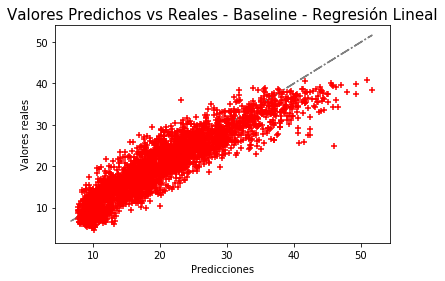

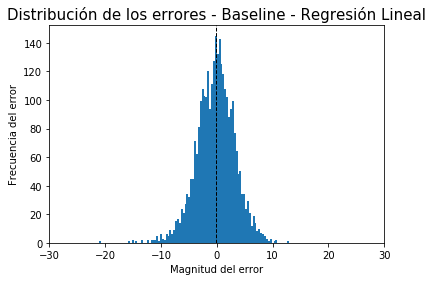

In [40]:
model_graph(y_test, base_linreg_testing_predictions, 'Baseline - Regresión Lineal')

In [41]:
results.loc[0, "Model"] = "Baseline - Regresión Lineal"
results.loc[0, "Training MAE"] = mean_absolute_error(y_train, base_linreg_training_predictions)
results.loc[0, "Training MSE"] = mean_squared_error(y_train, base_linreg_training_predictions)
results.loc[0, "Training RMSE"] = np.sqrt(mean_squared_error(y_train, base_linreg_training_predictions))
results.loc[0, "Training R2"] = r2_score(y_train, base_linreg_training_predictions)
results.loc[0, "Testing MAE"] = mean_absolute_error(y_test, base_linreg_testing_predictions)
results.loc[0, "Testing MSE"] = mean_squared_error(y_test, base_linreg_testing_predictions)
results.loc[0, "Testing RMSE"] = np.sqrt(mean_squared_error(y_test, base_linreg_testing_predictions))
results.loc[0, "Testing R2"] = r2_score(y_test, base_linreg_testing_predictions)

<a id="section_lasso"></a> 
#### 6.1.2. <u>Regresión Lasso

Optimizaremos el hiperparámetro alpha implementando la versión con cross-validation.

In [42]:
cv = KFold(n_splits = 5, shuffle = True, random_state = 15)

In [43]:
lassocv = LassoCV(alphas=[0.000001, 0.00001, 0.00001, 0.0001, 0.001, 0.1, 0.5, 1, 10, 100], cv = cv)
lassocv.fit(X_train, y_train)
lassocv_training_predictions = lassocv.predict(X_train)

In [44]:
lassocv.alpha_

1e-05

In [45]:
model_evaluation(y_train, lassocv_training_predictions)

MAE:  2.617230226355788
MSE:  11.230008485333137
RMSE:  3.351120482067623
R^2:  0.8359198393609053


In [46]:
lassocv_testing_predictions = lassocv.predict(X_test)

In [47]:
model_evaluation(y_test, lassocv_testing_predictions)

MAE:  2.647681121939467
MSE:  11.777006598520392
RMSE:  3.431764356496581
R^2:  0.8321940173197363


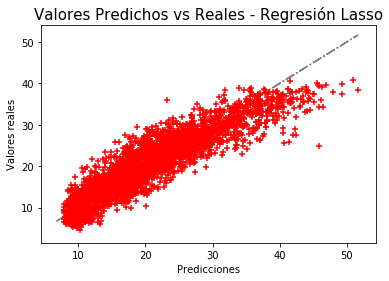

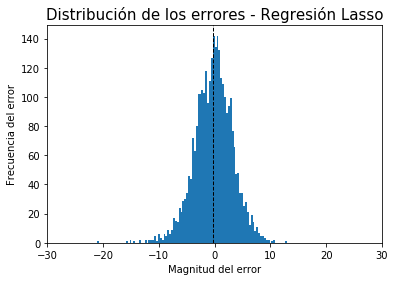

In [48]:
model_graph(y_test, lassocv_testing_predictions, 'Regresión Lasso')

In [49]:
results.loc[1, "Model"] = "Regresión Lasso"
results.loc[1, "Training MAE"] = mean_absolute_error(y_train, lassocv_training_predictions)
results.loc[1, "Training MSE"] = mean_squared_error(y_train, lassocv_training_predictions)
results.loc[1, "Training RMSE"] = np.sqrt(mean_squared_error(y_train, lassocv_training_predictions))
results.loc[1, "Training R2"] = r2_score(y_train, lassocv_training_predictions)
results.loc[1, "Testing MAE"] = mean_absolute_error(y_test, lassocv_testing_predictions)
results.loc[1, "Testing MSE"] = mean_squared_error(y_test, lassocv_testing_predictions)
results.loc[1, "Testing RMSE"] = np.sqrt(mean_squared_error(y_test, lassocv_testing_predictions))
results.loc[1, "Testing R2"] = r2_score(y_test, lassocv_testing_predictions)

<a id="section_ridge"></a> 
#### 6.1.3. <u> Regresión Ridge

Optimizaremos el hiperparámetro alpha implementando la versión con cross-validation.

In [50]:
ridgecv = RidgeCV(alphas=[0.00001, 0.00001, 0.0001, 0.001, 0.1, 0.5, 1, 10, 100], cv = cv)
ridgecv.fit(X_train, y_train)
ridgecv_training_predictions = ridgecv.predict(X_train)

In [51]:
ridgecv.alpha_

0.001

In [52]:
model_evaluation(y_train, ridgecv_training_predictions)

MAE:  2.617226429818827
MSE:  11.229781861992283
RMSE:  3.351086668827335
R^2:  0.8359231505244027


In [53]:
ridgecv_testing_predictions = ridgecv.predict(X_test)

In [54]:
model_evaluation(y_test, ridgecv_testing_predictions)

MAE:  2.6476214370241355
MSE:  11.776354569231863
RMSE:  3.4316693560469753
R^2:  0.8322033078312583


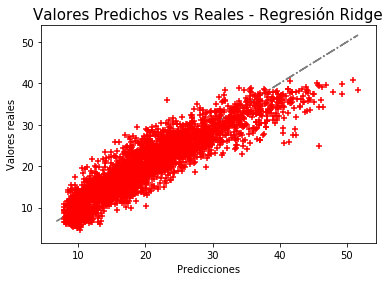

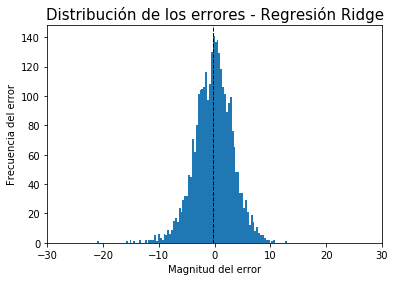

In [55]:
model_graph(y_test, ridgecv_testing_predictions, 'Regresión Ridge')

In [56]:
results.loc[2, "Model"] = "Regresión Ridge"
results.loc[2, "Training MAE"] = mean_absolute_error(y_train, ridgecv_training_predictions)
results.loc[2, "Training MSE"] = mean_squared_error(y_train, ridgecv_training_predictions)
results.loc[2, "Training RMSE"] = np.sqrt(mean_squared_error(y_train, ridgecv_training_predictions))
results.loc[2, "Training R2"] = r2_score(y_train, ridgecv_training_predictions)
results.loc[2, "Testing MAE"] = mean_absolute_error(y_test, ridgecv_testing_predictions)
results.loc[2, "Testing MSE"] = mean_squared_error(y_test, ridgecv_testing_predictions)
results.loc[2, "Testing RMSE"] = np.sqrt(mean_squared_error(y_test, ridgecv_testing_predictions))
results.loc[2, "Testing R2"] = r2_score(y_test, ridgecv_testing_predictions)

<a id="section_elastic"></a> 
#### 6.1.4. <u> Elastic-Net

Optimizaremos el hiperparámetro alpha implementando la versión con cross-validation.

In [57]:
elasticnetcv = ElasticNetCV(l1_ratio = np.linspace(0, 1, 25),
                            alphas = [0.000005, 0.00001, 0.000015, 0.001, 0.1, 0.5, 1], cv = cv)
elasticnetcv.fit(X_train, y_train)
elasticnetcv_training_predictions = elasticnetcv.predict(X_train)

In [58]:
elasticnetcv.alpha_

1e-05

In [59]:
elasticnetcv.l1_ratio_

0.375

In [60]:
model_evaluation(y_train, elasticnetcv_training_predictions)

MAE:  2.617214073857437
MSE:  11.230404370983011
RMSE:  3.351179549200999
R^2:  0.835914055128319


In [61]:
elasticnetcv_testing_predictions = elasticnetcv.predict(X_test)

In [62]:
model_evaluation(y_test, elasticnetcv_testing_predictions)

MAE:  2.6477674859365115
MSE:  11.777853878914689
RMSE:  3.431887801038182
R^2:  0.8321819447512121


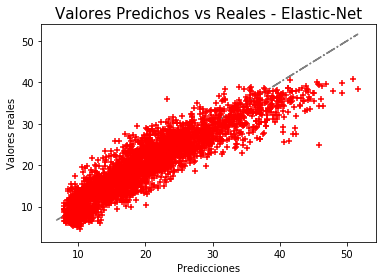

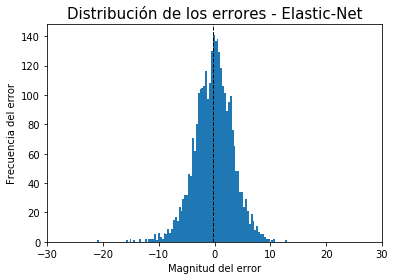

In [63]:
model_graph(y_test, ridgecv_testing_predictions, 'Elastic-Net')

In [64]:
results.loc[3, "Model"] = "Elastic-Net"
results.loc[3, "Training MAE"] = mean_absolute_error(y_train, elasticnetcv_training_predictions)
results.loc[3, "Training MSE"] = mean_squared_error(y_train, elasticnetcv_training_predictions)
results.loc[3, "Training RMSE"] = np.sqrt(mean_squared_error(y_train, elasticnetcv_training_predictions))
results.loc[3, "Training R2"] = r2_score(y_train, elasticnetcv_training_predictions)
results.loc[3, "Testing MAE"] = mean_absolute_error(y_test, elasticnetcv_testing_predictions)
results.loc[3, "Testing MSE"] = mean_squared_error(y_test, elasticnetcv_testing_predictions)
results.loc[3, "Testing RMSE"] = np.sqrt(mean_squared_error(y_test, elasticnetcv_testing_predictions))
results.loc[3, "Testing R2"] = r2_score(y_test, elasticnetcv_testing_predictions)

<a id="section_ols"></a> 
#### 6.1.5. <u> Statsmodels OLS
    
[Volver](#section_toc)

Corremos un modelo base para observar los p-valores de cada feature.

In [65]:
X = X_train
y = list(y_train)
x1 = sm.add_constant(X)
modelOLS = sm.OLS(y,x1).fit()
print(modelOLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     318.1
Date:                Sat, 28 Nov 2020   Prob (F-statistic):               0.00
Time:                        12:44:36   Log-Likelihood:                -18679.
No. Observations:                7107   AIC:                         3.758e+04
Df Residuals:                    6994   BIC:                         3.836e+04
Df Model:                         112                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

_____
A partir de los resultados obtenidos hacemos una eliminación recursiva de forma manual, iterando sobre versiones más reducidas del modelo inicial.

In [66]:
subset = ['year_2014','week_7','week_8','week_9','week_32','week_33','week_34','week_37','week_38','week_39',
          'week_40','week_41','week_42','week_43','week_44','week_45','week_46','week_47','week_48',
          'day_name_Thursday','day_name_Friday','day_name_Saturday','day_name_Sunday','hour_1','hour_2','hour_3',
          'hour_4','hour_5','hour_6','hour_8','hour_9','hour_10','hour_11','hour_12','hour_13','hour_14','hour_15',
          'hour_16','hour_17','hour_18','hour_19','hour_20','hour_21','hour_22','hour_23','summary_Mostly Cloudy',
          'summary_Overcast','summary_Foggy','summary_Windy and Overcast','precipType_snow','visibility','temperature',
          'pressure','apparentTemperature','windSpeed']

In [67]:
X = X_train[subset]
y = list(y_train)
x1 = sm.add_constant(X)
modelOLS = sm.OLS(y,x1).fit()
print(modelOLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     588.2
Date:                Sat, 28 Nov 2020   Prob (F-statistic):               0.00
Time:                        12:44:36   Log-Likelihood:                -18987.
No. Observations:                7107   AIC:                         3.809e+04
Df Residuals:                    7051   BIC:                         3.847e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

_____

<a id="section_pca"></a> 
#### 6.1.6. <u>Reducción de Dimensionalidad - PCA

[Volver](#section_toc)

Aplicaremos PCA para evaluar si la performance de los modelos lineales es optimizable tomando un número de features menores y más significativas.

In [68]:
from sklearn.decomposition import PCA

In [69]:
def plot_explained_variance(components_count, X):

    model_pca = PCA(components_count).fit(X)
    explained_variance = model_pca.explained_variance_ratio_

    cumulative_explained_variance = np.cumsum(explained_variance)

    plt.plot(cumulative_explained_variance)
    plt.xlabel('número de componentes')
    plt.ylabel('% de varianza explicada');

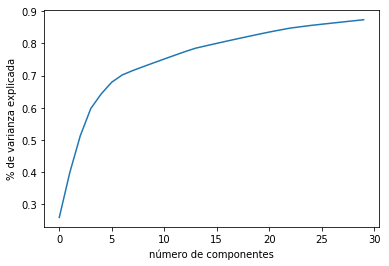

In [70]:
plot_explained_variance(30, X_train)

In [71]:
model_pca = PCA(30).fit(X_train)
X_train_PCA = model_pca.transform(X_train)
X_test_PCA = model_pca.transform(X_test)

In [72]:
ridgecv_pca = RidgeCV(alphas=[0.00001, 0.00001, 0.0001, 0.001, 0.1, 0.5, 1, 10, 100], cv = cv)
ridgecv_pca.fit(X_train_PCA, y_train)
ridgecv_pca_training_predictions = ridgecv_pca.predict(X_train_PCA)

In [73]:
ridgecv_pca.alpha_

1.0

In [74]:
model_evaluation(y_train, ridgecv_pca_training_predictions)

MAE:  5.204677026951127
MSE:  45.18734584951701
RMSE:  6.722153364028301
R^2:  0.3397736986996467


In [75]:
ridgecv_pca_testing_predictions = ridgecv_pca.predict(X_test_PCA)

In [76]:
model_evaluation(y_test, ridgecv_pca_testing_predictions)

MAE:  5.10627570371878
MSE:  43.86169984939439
RMSE:  6.62281660997754
R^2:  0.3750317125423783


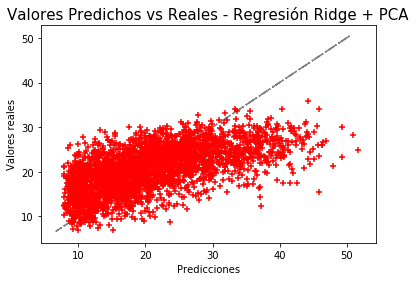

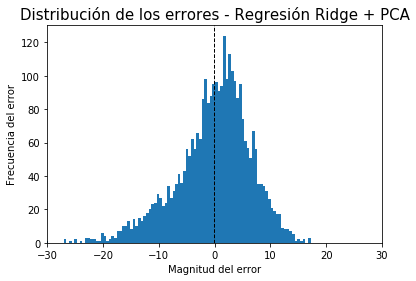

In [77]:
model_graph(y_test, ridgecv_pca_testing_predictions, 'Regresión Ridge + PCA')

Observamos que la reducción de la dimensionalidad a partir de PCA n el modelo más simple no mejora su performance, sino que la empeora drásticamente. Probaremos otra alternativa a continuación.

In [78]:
results.loc[4, "Model"] = "Regresión Ridge + PCA"
results.loc[4, "Training MAE"] = mean_absolute_error(y_train, ridgecv_pca_training_predictions)
results.loc[4, "Training MSE"] = mean_squared_error(y_train, ridgecv_pca_training_predictions)
results.loc[4, "Training RMSE"] = np.sqrt(mean_squared_error(y_train, ridgecv_pca_training_predictions))
results.loc[4, "Training R2"] = r2_score(y_train, ridgecv_pca_training_predictions)
results.loc[4, "Testing MAE"] = mean_absolute_error(y_test, ridgecv_pca_testing_predictions)
results.loc[4, "Testing MSE"] = mean_squared_error(y_test, ridgecv_pca_testing_predictions)
results.loc[4, "Testing RMSE"] = np.sqrt(mean_squared_error(y_test, ridgecv_pca_testing_predictions))
results.loc[4, "Testing R2"] = r2_score(y_test, ridgecv_pca_testing_predictions)

<a id="section_rfe"></a> 
#### 6.1.7. <u>Reducción de Dimensionalidad - Recursive Feature Elimination

[Volver](#section_toc)

Como última instancia, aplicaremos RFE para obtener las features que son estadísticamente relevantes y poder descartar al resto. Aplicaremos este subset de variables al modelo más simple de regresión lineal.

In [79]:
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select = 30, step = 1)
_ = selector.fit(X_train, y_train)

scores = pd.DataFrame()
scores["Attribute Name"] = X_train.columns
scores["Ranking"] = selector.ranking_
scores["Support"] = selector.support_

In [80]:
scores_df = pd.DataFrame(scores, columns = ['Attribute Name', 'Ranking', 'Support'])
scores_df.loc[scores_df['Support'] == True, :]

,Attribute Name,Ranking,Support
3,month_4,1,True
4,month_5,1,True
5,month_6,1,True
24,week_14,1,True
25,week_15,1,True
26,week_16,1,True
27,week_17,1,True
28,week_18,1,True
29,week_19,1,True
30,week_20,1,True


In [81]:
subset = scores_df.loc[scores_df['Support'] == True, :]['Attribute Name']
X_train_subset = X_train[subset]
X_test_subset = X_test[subset]

In [82]:
ridgecv_rfe = RidgeCV(alphas=[0.00001, 0.00001, 0.0001, 0.001, 0.1, 0.5, 1, 10, 100], cv = cv)
ridgecv_rfe.fit(X_train_subset, y_train)
ridgecv_rfe_training_predictions = ridgecv_rfe.predict(X_train_subset)

In [83]:
ridgecv_rfe.alpha_

0.5

In [84]:
model_evaluation(y_train, ridgecv_rfe_training_predictions)

MAE:  3.849035734416941
MSE:  24.92619991794484
RMSE:  4.992614537288538
R^2:  0.6358066076263297


In [85]:
ridgecv_rfe_testing_predictions = ridgecv_rfe.predict(X_test_PCA)

In [86]:
model_evaluation(y_test, ridgecv_rfe_testing_predictions)

MAE:  9.797058224948074
MSE:  153.94083202532096
RMSE:  12.40728947132777
R^2:  -1.1934429922007368


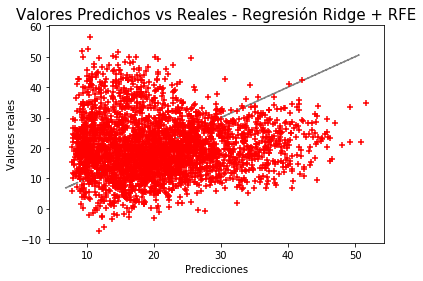

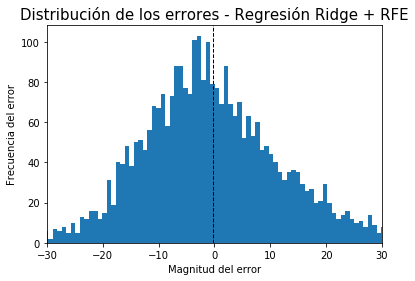

In [87]:
model_graph(y_test, ridgecv_rfe_testing_predictions, 'Regresión Ridge + RFE')

In [88]:
results.loc[5, "Model"] = "Regresión Ridge + RFE"
results.loc[5, "Training MAE"] = mean_absolute_error(y_train, ridgecv_rfe_training_predictions)
results.loc[5, "Training MSE"] = mean_squared_error(y_train, ridgecv_rfe_training_predictions)
results.loc[5, "Training RMSE"] = np.sqrt(mean_squared_error(y_train, ridgecv_rfe_training_predictions))
results.loc[5, "Training R2"] = r2_score(y_train, ridgecv_rfe_training_predictions)
results.loc[5, "Testing MAE"] = mean_absolute_error(y_test, ridgecv_rfe_testing_predictions)
results.loc[5, "Testing MSE"] = mean_squared_error(y_test, ridgecv_rfe_testing_predictions)
results.loc[5, "Testing RMSE"] = np.sqrt(mean_squared_error(y_test, ridgecv_rfe_testing_predictions))
results.loc[5, "Testing R2"] = r2_score(y_test, ridgecv_rfe_testing_predictions)

Observamos que el grado de dimensionalidad del problema no puede ser optimizable en términos del score obtenido. El rendimiento de la Regresión Ridge es el máximo alcanzable por modelos lineales.

In [89]:
results

,Model,Training MAE,Training MSE,Training RMSE,Training R2,Testing MAE,Testing MSE,Testing RMSE,Testing R2
0,Baseline - Regresión Lineal,2.61696,11.2299,3.3511,0.835922,2.64751,11.7768,3.43173,0.832197
1,Regresión Lasso,2.61723,11.23,3.35112,0.83592,2.64768,11.777,3.43176,0.832194
2,Regresión Ridge,2.61723,11.2298,3.35109,0.835923,2.64762,11.7764,3.43167,0.832203
3,Elastic-Net,2.61721,11.2304,3.35118,0.835914,2.64777,11.7779,3.43189,0.832182
4,Regresión Ridge + PCA,5.20468,45.1873,6.72215,0.339774,5.10628,43.8617,6.62282,0.375032
5,Regresión Ridge + RFE,3.84904,24.9262,4.99261,0.635807,9.79706,153.941,12.4073,-1.19344


______

<a id="section_knr"></a> 

### 6.2. Modelo de K-vecinos

[Volver](#section_toc)

<a id="section_knr1"></a> 
#### 6.2.1. <u>Con optimización por GridSearch y sobre el total de features

[Volver](#section_toc)

Analizaremos la aplicabilidad de este tipo de modelos para el problema que estamos tratando de predecir. Para ello aplicaremos Gridsearch, buscando optimizar la cantidad de vecinos así como el peso relativo de las features.

In [90]:
n_neighbors = list(range(1, 11))
weights = ['uniform', 'distance']

param_grid = dict(n_neighbors = n_neighbors, weights = weights)

knr = KNeighborsRegressor()
knr_gs = GridSearchCV(knr, param_grid = param_grid, cv = cv)
knr_gs.fit(X_train, y_train)
knr_training_predictions = knr_gs.best_estimator_.predict(X_train)
knr_gs.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

In [91]:
model_evaluation(y_train, knr_training_predictions)

MAE:  0.0
MSE:  0.0
RMSE:  0.0
R^2:  1.0


In [92]:
knr_testing_predictions = knr_gs.best_estimator_.predict(X_test)

In [93]:
model_evaluation(y_test, knr_testing_predictions)

MAE:  3.5256304134722134
MSE:  23.568146245708853
RMSE:  4.854703517796824
R^2:  0.6641866583304612


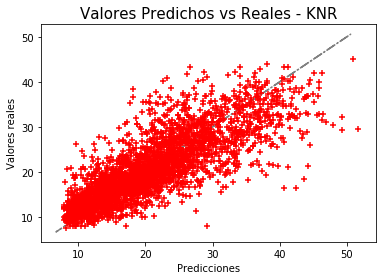

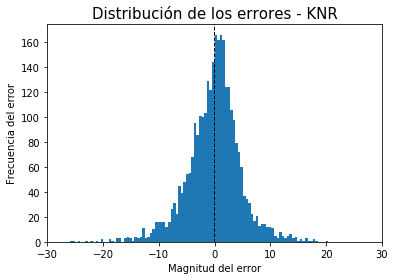

In [94]:
model_graph(y_test, knr_testing_predictions, 'KNR')

In [95]:
results.loc[6, "Model"] = "KNR"
results.loc[6, "Training MAE"] = mean_absolute_error(y_train, knr_training_predictions)
results.loc[6, "Training MSE"] = mean_squared_error(y_train, knr_training_predictions)
results.loc[6, "Training RMSE"] = np.sqrt(mean_squared_error(y_train, knr_training_predictions))
results.loc[6, "Training R2"] = r2_score(y_train, knr_training_predictions)
results.loc[6, "Testing MAE"] = mean_absolute_error(y_test, knr_testing_predictions)
results.loc[6, "Testing MSE"] = mean_squared_error(y_test, knr_testing_predictions)
results.loc[6, "Testing RMSE"] = np.sqrt(mean_squared_error(y_test, knr_testing_predictions))
results.loc[6, "Testing R2"] = r2_score(y_test, knr_testing_predictions)

<a id="section_knr2"></a> 
#### 6.2.2. <u>Con optimización por GridSearch + PCA

[Volver](#section_toc)

A continuación probaremos el mismo esquema pero aplicando al dataset de features reducidas por PCA. El algoritmo de KNR es un algoritmo que tiende al overfitting, sobre todo cuando hay una gran dimensionalidad en los datos, por lo cual queremos probar la performance del modelo en un espacio reducido de features.

In [96]:
n_neighbors = list(range(1, 11))
weights = ['uniform', 'distance']

param_grid = dict(n_neighbors = n_neighbors, weights = weights)

knr = KNeighborsRegressor()
knr_pca_gs = GridSearchCV(knr, param_grid = param_grid, cv = cv)
knr_pca_gs.fit(X_train_PCA, y_train)
knr_pca_training_predictions = knr_pca_gs.best_estimator_.predict(X_train_PCA)
knr_gs.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

In [97]:
model_evaluation(y_train, knr_pca_training_predictions)

MAE:  0.0
MSE:  0.0
RMSE:  0.0
R^2:  1.0


In [98]:
knr_pca_testing_predictions = knr_pca_gs.best_estimator_.predict(X_test_PCA)

In [99]:
model_evaluation(y_test, knr_pca_testing_predictions)

MAE:  3.8033284432904093
MSE:  27.323872380269194
RMSE:  5.227224156306021
R^2:  0.610672778600868


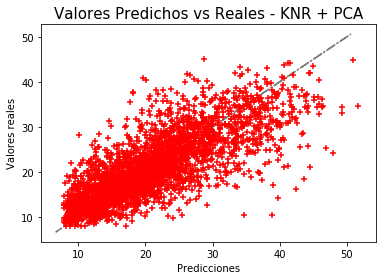

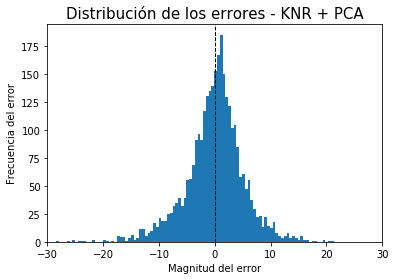

In [100]:
model_graph(y_test, knr_pca_testing_predictions, 'KNR + PCA')

In [101]:
results.loc[7, "Model"] = "KNR + PCA"
results.loc[7, "Training MAE"] = mean_absolute_error(y_train, knr_pca_training_predictions)
results.loc[7, "Training MSE"] = mean_squared_error(y_train, knr_pca_training_predictions)
results.loc[7, "Training RMSE"] = np.sqrt(mean_squared_error(y_train, knr_pca_training_predictions))
results.loc[7, "Training R2"] = r2_score(y_train, knr_pca_training_predictions)
results.loc[7, "Testing MAE"] = mean_absolute_error(y_test, knr_pca_testing_predictions)
results.loc[7, "Testing MSE"] = mean_squared_error(y_test, knr_pca_testing_predictions)
results.loc[7, "Testing RMSE"] = np.sqrt(mean_squared_error(y_test, knr_pca_testing_predictions))
results.loc[7, "Testing R2"] = r2_score(y_test, knr_pca_testing_predictions)

Observamos que la aplicación de PCA no ayuda a atenuar los problemas de este tipo de modelos para el problema que estamos tratando de resolver. El overfitting se sostiene y el rendimiento en el set de validación empeora ligeramente, por lo cual concluimos que es un modelo bastante inferior respecto a las soluciones que nos brindaron los modelos lineales.

In [102]:
results.loc[6:,:]

,Model,Training MAE,Training MSE,Training RMSE,Training R2,Testing MAE,Testing MSE,Testing RMSE,Testing R2
6,KNR,0,0,0,1,3.52563,23.5681,4.8547,0.664187
7,KNR + PCA,0,0,0,1,3.80333,27.3239,5.22722,0.610673


______

<a id="section_trees"></a> 

### 6.3. Modelos de árbol

[Volver](#section_toc)

A continuación evaluaremos los modelos de árbol, en diferentes versiones: desde los modelos más simples (sin optimizar) hasta los más complejos.

<a id="section_bagging"></a> 
#### 6.3.1. <u>Bagging

[Volver](#section_toc)

In [103]:
bagging = BaggingRegressor()
bagging.fit(X_train, y_train)
bagging_training_predictions = bagging.predict(X_train)

In [104]:
model_evaluation(y_train, bagging_training_predictions)

MAE:  0.9125436053306601
MSE:  1.7397137316941487
RMSE:  1.318982081642563
R^2:  0.9745812740092559


In [105]:
bagging_testing_predictions = bagging.predict(X_test)

In [106]:
model_evaluation(y_test, bagging_testing_predictions)

MAE:  2.2795447814417815
MSE:  9.839172087631521
RMSE:  3.136745461084071
R^2:  0.8598054669399046


In [107]:
results.loc[8, "Model"] = "Bagging"
results.loc[8, "Training MAE"] = mean_absolute_error(y_train, bagging_training_predictions)
results.loc[8, "Training MSE"] = mean_squared_error(y_train, bagging_training_predictions)
results.loc[8, "Training RMSE"] = np.sqrt(mean_squared_error(y_train, bagging_training_predictions))
results.loc[8, "Training R2"] = r2_score(y_train, bagging_training_predictions)
results.loc[8, "Testing MAE"] = mean_absolute_error(y_test, bagging_testing_predictions)
results.loc[8, "Testing MSE"] = mean_squared_error(y_test, bagging_testing_predictions)
results.loc[8, "Testing RMSE"] = np.sqrt(mean_squared_error(y_test, bagging_testing_predictions))
results.loc[8, "Testing R2"] = r2_score(y_test, bagging_testing_predictions)

<a id="section_randomforest"></a> 
#### 6.3.2. <u>Random Forest

[Volver](#section_toc)

In [108]:
randomforest = RandomForestRegressor()
randomforest.fit(X_train, y_train)
randomforest_training_predictions = randomforest.predict(X_train)

In [109]:
model_evaluation(y_train, randomforest_training_predictions)

MAE:  0.8229204432701863
MSE:  1.261084683449569
RMSE:  1.1229802685041126
R^2:  0.9815744593861926


In [110]:
randomforest_testing_predictions = randomforest.predict(X_test)

In [111]:
model_evaluation(y_test, randomforest_testing_predictions)

MAE:  2.1871999197015293
MSE:  9.149034681666556
RMSE:  3.02473712604361
R^2:  0.869638966193179


In [112]:
results.loc[9, "Model"] = "Random Forest"
results.loc[9, "Training MAE"] = mean_absolute_error(y_train, randomforest_training_predictions)
results.loc[9, "Training MSE"] = mean_squared_error(y_train, randomforest_training_predictions)
results.loc[9, "Training RMSE"] = np.sqrt(mean_squared_error(y_train, randomforest_training_predictions))
results.loc[9, "Training R2"] = r2_score(y_train, randomforest_training_predictions)
results.loc[9, "Testing MAE"] = mean_absolute_error(y_test, randomforest_testing_predictions)
results.loc[9, "Testing MSE"] = mean_squared_error(y_test, randomforest_testing_predictions)
results.loc[9, "Testing RMSE"] = np.sqrt(mean_squared_error(y_test, randomforest_testing_predictions))
results.loc[9, "Testing R2"] = r2_score(y_test, randomforest_testing_predictions)

<a id="section_extra"></a> 
#### 6.3.3. <u>ExtraTrees

[Volver](#section_toc)

In [113]:
extra = ExtraTreesRegressor()
extra.fit(X_train, y_train)
extra_training_predictions = extra.predict(X_train)

In [114]:
model_evaluation(y_train, extra_training_predictions)

MAE:  8.748076040592922e-12
MSE:  9.764986668658276e-20
RMSE:  3.124897865316285e-10
R^2:  1.0


In [115]:
extra_testing_predictions = extra.predict(X_test)

In [116]:
model_evaluation(y_test, extra_testing_predictions)

MAE:  2.117617985794813
MSE:  8.62132237337629
RMSE:  2.9362088436240854
R^2:  0.8771581334556178


In [117]:
results.loc[10, "Model"] = "ExtraTrees"
results.loc[10, "Training MAE"] = mean_absolute_error(y_train, extra_training_predictions)
results.loc[10, "Training MSE"] = mean_squared_error(y_train, extra_training_predictions)
results.loc[10, "Training RMSE"] = np.sqrt(mean_squared_error(y_train, extra_training_predictions))
results.loc[10, "Training R2"] = r2_score(y_train, extra_training_predictions)
results.loc[10, "Testing MAE"] = mean_absolute_error(y_test, extra_testing_predictions)
results.loc[10, "Testing MSE"] = mean_squared_error(y_test, extra_testing_predictions)
results.loc[10, "Testing RMSE"] = np.sqrt(mean_squared_error(y_test, extra_testing_predictions))
results.loc[10, "Testing R2"] = r2_score(y_test, extra_testing_predictions)

<a id="section_gradient"></a> 
#### 6.3.4. <u>Gradient Boosting

[Volver](#section_toc)

In [118]:
gradient = GradientBoostingRegressor()
gradient.fit(X_train, y_train)
gradient_training_predictions = gradient.predict(X_train)

In [119]:
model_evaluation(y_train, gradient_training_predictions)

MAE:  2.5508491998930567
MSE:  11.229615483296277
RMSE:  3.351061844146759
R^2:  0.8359255814614054


In [120]:
gradient_testing_predictions = gradient.predict(X_test)

In [121]:
model_evaluation(y_test, gradient_testing_predictions)

MAE:  2.630066390127631
MSE:  12.622565956513002
RMSE:  3.552825066973183
R^2:  0.8201459711718918


In [122]:
results.loc[11, "Model"] = "Gradient Boosting"
results.loc[11, "Training MAE"] = mean_absolute_error(y_train, gradient_training_predictions)
results.loc[11, "Training MSE"] = mean_squared_error(y_train, gradient_training_predictions)
results.loc[11, "Training RMSE"] = np.sqrt(mean_squared_error(y_train, gradient_training_predictions))
results.loc[11, "Training R2"] = r2_score(y_train, gradient_training_predictions)
results.loc[11, "Testing MAE"] = mean_absolute_error(y_test, gradient_testing_predictions)
results.loc[11, "Testing MSE"] = mean_squared_error(y_test, gradient_testing_predictions)
results.loc[11, "Testing RMSE"] = np.sqrt(mean_squared_error(y_test, gradient_testing_predictions))
results.loc[11, "Testing R2"] = r2_score(y_test, gradient_testing_predictions)

<a id="section_ada"></a> 
#### 6.3.5. <u>AdaBoost

[Volver](#section_toc)

In [123]:
ada = AdaBoostRegressor()
ada.fit(X_train, y_train)
ada_training_predictions = ada.predict(X_train)

In [124]:
model_evaluation(y_train, ada_training_predictions)

MAE:  5.348798356737485
MSE:  40.67208330008243
RMSE:  6.3774668403749795
R^2:  0.4057455993804445


In [125]:
ada_testing_predictions = ada.predict(X_test)

In [126]:
model_evaluation(y_test, ada_testing_predictions)

MAE:  5.337767182523627
MSE:  40.8560765853752
RMSE:  6.391875826811344
R^2:  0.4178576684562324


In [127]:
results.loc[12, "Model"] = "AdaBoost"
results.loc[12, "Training MAE"] = mean_absolute_error(y_train, ada_training_predictions)
results.loc[12, "Training MSE"] = mean_squared_error(y_train, ada_training_predictions)
results.loc[12, "Training RMSE"] = np.sqrt(mean_squared_error(y_train, ada_training_predictions))
results.loc[12, "Training R2"] = r2_score(y_train, ada_training_predictions)
results.loc[12, "Testing MAE"] = mean_absolute_error(y_test, ada_testing_predictions)
results.loc[12, "Testing MSE"] = mean_squared_error(y_test, ada_testing_predictions)
results.loc[12, "Testing RMSE"] = np.sqrt(mean_squared_error(y_test, ada_testing_predictions))
results.loc[12, "Testing R2"] = r2_score(y_test, ada_testing_predictions)

<a id="section_lgbm"></a> 
#### 6.3.6. <u>LightGBM

[Volver](#section_toc)

In [128]:
lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)
lgbm_training_predictions = lgbm.predict(X_train)

In [129]:
model_evaluation(y_train, lgbm_training_predictions)

MAE:  1.707275518571317
MSE:  5.0100541229359425
RMSE:  2.2383150186995446
R^2:  0.9267987654349932


In [130]:
lgbm_testing_predictions = lgbm.predict(X_test)

In [131]:
model_evaluation(y_test, lgbm_testing_predictions)

MAE:  2.109469349264184
MSE:  8.139031693046983
RMSE:  2.852898822784815
R^2:  0.8840301056221579


In [132]:
results.loc[13, "Model"] = "LightGBM"
results.loc[13, "Training MAE"] = mean_absolute_error(y_train, lgbm_training_predictions)
results.loc[13, "Training MSE"] = mean_squared_error(y_train, lgbm_training_predictions)
results.loc[13, "Training RMSE"] = np.sqrt(mean_squared_error(y_train, lgbm_training_predictions))
results.loc[13, "Training R2"] = r2_score(y_train, lgbm_training_predictions)
results.loc[13, "Testing MAE"] = mean_absolute_error(y_test, lgbm_testing_predictions)
results.loc[13, "Testing MSE"] = mean_squared_error(y_test, lgbm_testing_predictions)
results.loc[13, "Testing RMSE"] = np.sqrt(mean_squared_error(y_test, lgbm_testing_predictions))
results.loc[13, "Testing R2"] = r2_score(y_test, lgbm_testing_predictions)

<a id="section_cat"></a> 
#### 6.3.7. <u>CatBoost

[Volver](#section_toc)

In [133]:
cat = CatBoostRegressor(verbose = 0)
cat.fit(X_train, y_train)
cat_training_predictions = cat.predict(X_train)

In [134]:
model_evaluation(y_train, cat_training_predictions)

MAE:  1.4672730449809024
MSE:  3.5885357565254266
RMSE:  1.8943430936674135
R^2:  0.9475683812564493


In [135]:
cat_testing_predictions = cat.predict(X_test)

In [136]:
model_evaluation(y_test, cat_testing_predictions)

MAE:  1.983608116812225
MSE:  7.172506273713144
RMSE:  2.678153519444534
R^2:  0.8978017500905533


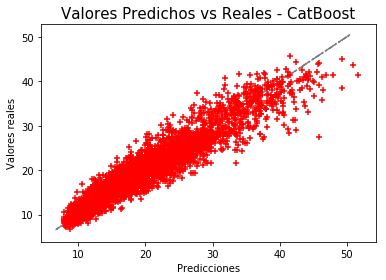

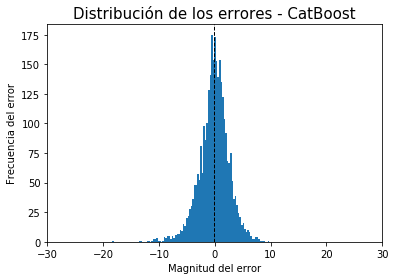

In [137]:
model_graph(y_test, cat_testing_predictions, 'CatBoost')

In [138]:
results.loc[14, "Model"] = "CatBoost"
results.loc[14, "Training MAE"] = mean_absolute_error(y_train, cat_training_predictions)
results.loc[14, "Training MSE"] = mean_squared_error(y_train, cat_training_predictions)
results.loc[14, "Training RMSE"] = np.sqrt(mean_squared_error(y_train, cat_training_predictions))
results.loc[14, "Training R2"] = r2_score(y_train, cat_training_predictions)
results.loc[14, "Testing MAE"] = mean_absolute_error(y_test, cat_testing_predictions)
results.loc[14, "Testing MSE"] = mean_squared_error(y_test, cat_testing_predictions)
results.loc[14, "Testing RMSE"] = np.sqrt(mean_squared_error(y_test, cat_testing_predictions))
results.loc[14, "Testing R2"] = r2_score(y_test, cat_testing_predictions)

In [139]:
results.loc[8:,:]

,Model,Training MAE,Training MSE,Training RMSE,Training R2,Testing MAE,Testing MSE,Testing RMSE,Testing R2
8,Bagging,0.912544,1.73971,1.31898,0.974581,2.27954,9.83917,3.13675,0.859805
9,Random Forest,0.82292,1.26108,1.12298,0.981574,2.1872,9.14903,3.02474,0.869639
10,ExtraTrees,8.74808e-12,9.76499e-20,3.1249e-10,1,2.11762,8.62132,2.93621,0.877158
11,Gradient Boosting,2.55085,11.2296,3.35106,0.835926,2.63007,12.6226,3.55283,0.820146
12,AdaBoost,5.3488,40.6721,6.37747,0.405746,5.33777,40.8561,6.39188,0.417858
13,LightGBM,1.70728,5.01005,2.23832,0.926799,2.10947,8.13903,2.8529,0.88403
14,CatBoost,1.46727,3.58854,1.89434,0.947568,1.98361,7.17251,2.67815,0.897802


_____________________________________________

<a id="section_summary"></a> 
### 6.4. Resumen de Resultados

[Volver](#section_toc)

Presentamos un cuadro resumen con los resultados en set de validación de todos los modelos explorados (lineales, de k-vecinos y de árbol).

In [140]:
results

,Model,Training MAE,Training MSE,Training RMSE,Training R2,Testing MAE,Testing MSE,Testing RMSE,Testing R2
0,Baseline - Regresión Lineal,2.61696,11.2299,3.3511,0.835922,2.64751,11.7768,3.43173,0.832197
1,Regresión Lasso,2.61723,11.23,3.35112,0.83592,2.64768,11.777,3.43176,0.832194
2,Regresión Ridge,2.61723,11.2298,3.35109,0.835923,2.64762,11.7764,3.43167,0.832203
3,Elastic-Net,2.61721,11.2304,3.35118,0.835914,2.64777,11.7779,3.43189,0.832182
4,Regresión Ridge + PCA,5.20468,45.1873,6.72215,0.339774,5.10628,43.8617,6.62282,0.375032
5,Regresión Ridge + RFE,3.84904,24.9262,4.99261,0.635807,9.79706,153.941,12.4073,-1.19344
6,KNR,0,0,0,1,3.52563,23.5681,4.8547,0.664187
7,KNR + PCA,0,0,0,1,3.80333,27.3239,5.22722,0.610673
8,Bagging,0.912544,1.73971,1.31898,0.974581,2.27954,9.83917,3.13675,0.859805
9,Random Forest,0.82292,1.26108,1.12298,0.981574,2.1872,9.14903,3.02474,0.869639


In [141]:
ordered_results = results.sort_values(by = 'Testing R2', ascending = False)
ordered_filtered_results = ordered_results.iloc[:14,:]

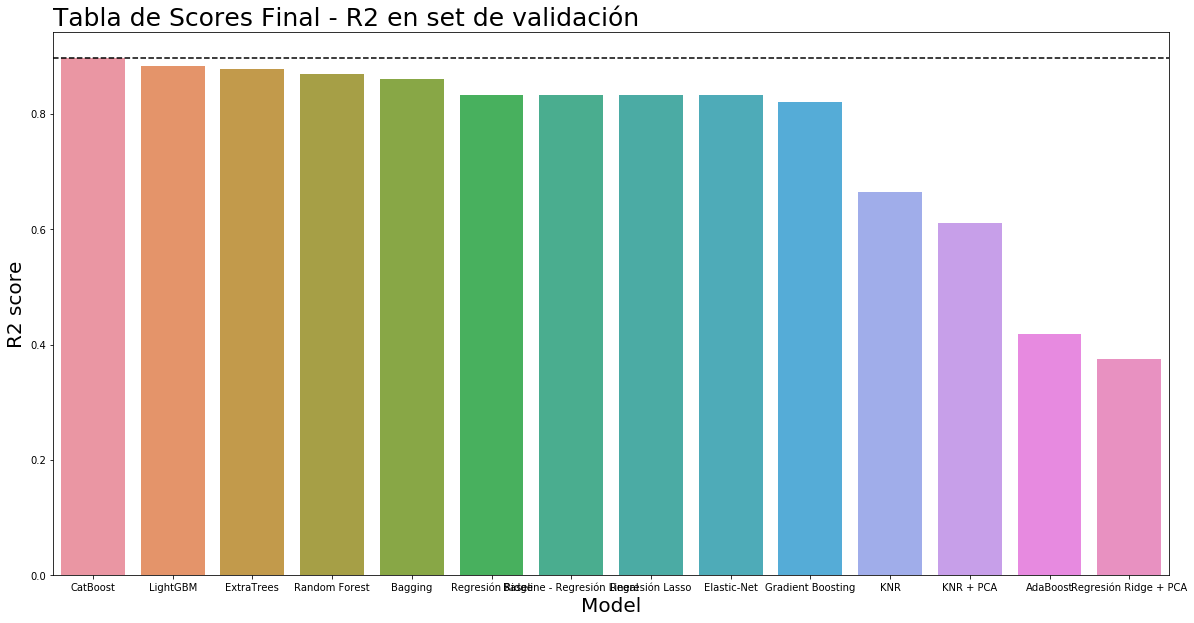

In [142]:
plt.figure(figsize=(20,10))
plt.title('Tabla de Scores Final - R2 en set de validación', fontsize=25, loc='left')
plt.axhline(y = r2_score(y_test, cat_testing_predictions), color='black', linestyle='dashed')
sns.barplot(x='Model',y='Testing R2', data=ordered_filtered_results);
plt.xticks(fontsize = 10)
plt.ylabel("R2 score", fontsize = 20)
plt.xlabel("Model", fontsize = 20)
plt.show()

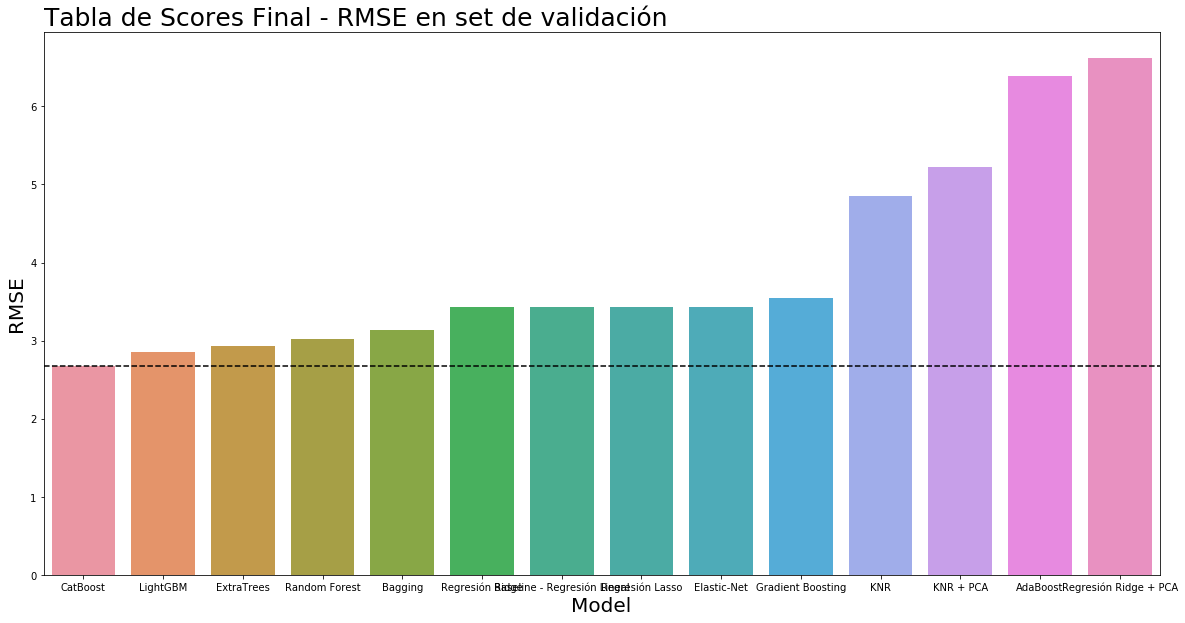

In [143]:
plt.figure(figsize=(20,10))
plt.title('Tabla de Scores Final - RMSE en set de validación', fontsize=25, loc='left')
plt.axhline(y = np.sqrt(mean_squared_error(y_test, cat_testing_predictions)), color='black', linestyle='dashed')
sns.barplot(x='Model',y='Testing RMSE', data=ordered_filtered_results);
plt.xticks(fontsize = 10)
plt.ylabel("RMSE", fontsize = 20)
plt.xlabel("Model", fontsize = 20)
plt.show()

_____________________________________________

<a id="section_featimp"></a> 
### 6.5. Feature Importance

[Volver](#section_toc)

Tomamos de referencia el modelo de mejor performance en set de entrenamiento

,importances
hour_19,10.627763
hour_20,9.157808
hour_21,7.678542
hour_18,7.621293
summary_Clear,6.522136
apparentTemperature,6.414402
temperature,5.675147
hour_3,4.831131
hour_4,4.555257
hour_2,3.986207


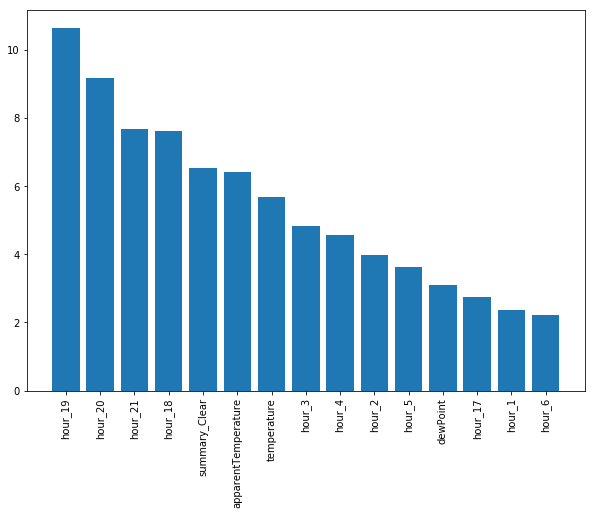

In [144]:
importancias = pd.DataFrame({'importances' : cat.feature_importances_})

feature_names = X_train.columns[importancias.index]
importancias.index = feature_names
importancias = importancias.sort_values(by = 'importances', ascending = False)

top_15_importances = importancias.iloc[0:15, :]
plt.figure(figsize = [10, 7])
plt.bar(height = top_15_importances['importances'], x = top_15_importances.index)
plt.xticks(rotation=90)
top_15_importances.head(20)

_____________________________________________

<a id="section_amp"></a> 

# <font color='skyblue'>7. Uso del modelo para predecir nuevos datos</font>

[Volver](#section_toc)

Vamos a evaluar nuestro modelo prediciendo valores de consumo para el caso de otros blocks. Ahora bien, no debemos perder de vista que <b>los distintos blocks presentan distintos patrones de consumo</b> (<b><u>ver notebook "Desafio_Final Clustering"</b></u>), por lo cual la capacidad predictiva de nuestro modelo entrenado en un único block puede perder eficacia, precisamente en función de esas diferencias.

<a id="section_random"></a> 
### 7.1. 'Block' al azar

[Volver](#section_toc)

In [20]:
## Seleccionamos aleatoriamente un block del total (semilla fijada en 198)

blocks = np.arange(0,111)
#blocks = np.delete(blocks, selected_block)

random_generator = np.random.default_rng(seed = 198)
new_block = random_generator.choice(blocks).astype('str')

In [21]:
selected_block, new_block

('16', '44')

In [22]:
## Importamos el .csv del block seleccionado

data_location = 'data/halfhourly_dataset/halfhourly_dataset/block_%s.csv' % (new_block)
block_data = pd.read_csv(data_location)

In [148]:
## Realizamos las transformaciones necesarias para operar con el campo 'energy'.

block_data['energy(kWh/hh)'] = block_data['energy(kWh/hh)'].replace(to_replace = 'Null', value = 0)
block_data['energy(kWh/hh)'] = block_data['energy(kWh/hh)'].astype('float64')

## Transformamos la columna 'tstp' a datetime y generamos nuevas columnas relacionadas a la fecha

block_data['full_datetime'] = pd.to_datetime(block_data['tstp'])
block_data['date'] = block_data['full_datetime'].dt.date
block_data['year'] = block_data['full_datetime'].dt.year
block_data['month'] = block_data['full_datetime'].dt.month
block_data['week'] = block_data['full_datetime'].dt.week
block_data['day_name'] = block_data['full_datetime'].dt.day_name()
block_data['time'] = block_data['full_datetime'].dt.time
block_data['hour'] = block_data['full_datetime'].dt.hour
block_data['minute'] = block_data['full_datetime'].dt.minute

## Agrupamos la información para que quede en energía por hora (los .csv tiene registros cada media hora)

block_data_hourly = block_data.groupby(['LCLid', 'date', 'year', 'month', 'week', 'day_name', 'hour'])['energy(kWh/hh)'].sum()
block_data_hourly = block_data_hourly.reset_index()

## Unimos el dataset sobre consumo de energía con los datos específicos de cada suministro

df_block = block_data_hourly.merge(info_df, on = 'LCLid', how = 'left')

## Unimos el dataset resultante con el que contiene variables climáticas

df_block_full = df_block.merge(weather, on = ['date', 'hour'], how = 'left')

## Unimos el dataset resultante con el listado de feriados, creando una dummie ('is_holiday') con valor 1 para los feriados.

df_block_full['is_holiday'] = df_block_full['full_datetime'].isin(holidays['full_datetime'])

## Limpiamos el resultado final, completando faltantes de clima y eliminando columnas redundantes

df_block_full = df_block_full.sort_values(by = ['LCLid', 'date', 'year_x', 'month_x', 'week_x', 'day_name_x', 'hour'], ascending = True)
df_block_full = df_block_full.fillna(axis = 0, method = 'bfill')
df_block_full = df_block_full.drop(columns = ['date', 'full_datetime', 'year_y', 'month_y', 'week_y', 'day_name_y', 'minute', 'time', 'icon'])
df_block_full = df_block_full.rename(mapper = {'energy(kWh/hh)' : 'energy', 'year_x' : 'year', 'month_x' : 'month', 'week_x' : 'week', 'day_name_x' : 'day_name'}, axis = 1)
df_block_full['year'] = df_block_full['year'].astype('object')
df_block_full['month'] = df_block_full['month'].astype('object')
df_block_full['week'] = df_block_full['week'].astype('object')
df_block_full['hour'] = df_block_full['hour'].astype('object')

year_mask = df_block_full['year'] >= 2013
df_block_full = df_block_full[year_mask]

In [149]:
df_block_summary = df_block_full.groupby(['block', 'year', 'month', 'week', 'day_name', 'hour',
                                          'visibility','windBearing',
                                          'temperature', 'dewPoint', 'pressure', 'apparentTemperature',
                                          'windSpeed', 'precipType', 'humidity', 'summary', 'is_holiday'])['energy'].sum()
df_block_summary = df_block_summary.reset_index()
df_block_summary['is_holiday'] = df_block_summary['is_holiday'].astype('category')
df_block_summary = df_block_summary.drop(columns = 'block')

In [150]:
X_test_2 = df_block_summary.drop(columns = 'energy')
y_test_2 = df_block_summary['energy']

In [151]:
X_test_2_categorical = X_test_2[categorical]
X_test_2_categorical = pd.DataFrame(encoder.transform(X_test_2_categorical), columns = encoder.get_feature_names(categorical))

In [152]:
X_test_2_numerical = X_test_2[numerical]
X_test_2_numerical = pd.DataFrame(scaler.transform(X_test_2_numerical), columns = X_test_numerical.columns)

In [153]:
X_test_2 = pd.concat([X_test_2_categorical, X_test_2_numerical], axis = 1)
X_test_2.shape, X_test_2_categorical.shape, X_test_2_numerical.shape, y_test_2.shape

((10153, 113), (10153, 105), (10153, 8), (10153,))

In [154]:
cat_testing_predictions_2 = cat.predict(X_test_2)

In [155]:
model_evaluation(y_test_2, cat_testing_predictions_2)

MAE:  2.854483345498464
MSE:  14.29563670934513
RMSE:  3.7809571155125696
R^2:  0.6971072984410509


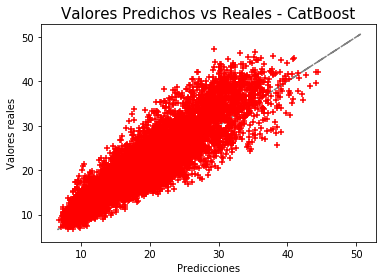

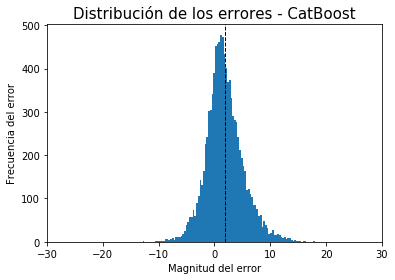

In [156]:
model_graph(y_test_2, cat_testing_predictions_2, 'CatBoost')

Observamos que el aplicar el modelo en un block de distinta naturaleza reduce en cierta forma la performance predictiva de nuestro modelo. El block seleccionado aleatoriamente pertenece al cluster 4 de consumo, mientras el block original pertenece al cluster 3, con un consumo levemente mayor y también una dispersión poco por encima.

<a id="section_same"></a> 
### 7.2. 'Block' dentro del mismo cluster de consumo

[Volver](#section_toc)

A continuación, tomaremos de referencia un block perteneciente al mismo cluster de consumo que el original, para evaluar si la performance se sostiene o el modelo está demasiado ajustado a los datos del original (overfitting) o es válido para generalizar en una zona de perfil similar

In [157]:
cluster_data_location = 'block_clustering.csv'
block_clustering = pd.read_csv(cluster_data_location)

In [158]:
block_clustering.loc[block_clustering['block']=='block_16',:]

,block,energy_std,energy_mean,cluster
20,block_16,0.175264,0.214347,3


In [159]:
cluster_mask = block_clustering['cluster'] == 3
cluster = block_clustering[cluster_mask]
list_cluster_3 = cluster['block'].values
list_cluster_3

array(['block_104', 'block_110', 'block_13', 'block_15', 'block_16',
       'block_17', 'block_18', 'block_19', 'block_20', 'block_22',
       'block_23', 'block_25', 'block_26', 'block_27', 'block_31',
       'block_33', 'block_35', 'block_36', 'block_37', 'block_38',
       'block_39', 'block_4', 'block_40', 'block_41', 'block_42',
       'block_48', 'block_49', 'block_51', 'block_54', 'block_57',
       'block_58', 'block_59', 'block_60', 'block_61', 'block_62',
       'block_63', 'block_65', 'block_67', 'block_69', 'block_70',
       'block_71', 'block_72', 'block_74', 'block_75', 'block_76',
       'block_77', 'block_79', 'block_80', 'block_81', 'block_82',
       'block_83', 'block_84', 'block_85', 'block_88', 'block_89'],
      dtype=object)

In [160]:
score_summary = []

for i in list_cluster_3:

    ## Importamos el .csv del block seleccionado

    data_location = 'data/halfhourly_dataset/%s.csv' % (i)
    block_data = pd.read_csv(data_location)

    ## Realizamos las transformaciones necesarias para operar con el campo 'energy'.

    block_data['energy(kWh/hh)'] = block_data['energy(kWh/hh)'].replace(to_replace = 'Null', value = 0)
    block_data['energy(kWh/hh)'] = block_data['energy(kWh/hh)'].astype('float64')

    ## Transformamos la columna 'tstp' a datetime y generamos nuevas columnas relacionadas a la fecha

    block_data['full_datetime'] = pd.to_datetime(block_data['tstp'])
    block_data['date'] = block_data['full_datetime'].dt.date
    block_data['year'] = block_data['full_datetime'].dt.year
    block_data['month'] = block_data['full_datetime'].dt.month
    block_data['week'] = block_data['full_datetime'].dt.week
    block_data['day_name'] = block_data['full_datetime'].dt.day_name()
    block_data['time'] = block_data['full_datetime'].dt.time
    block_data['hour'] = block_data['full_datetime'].dt.hour
    block_data['minute'] = block_data['full_datetime'].dt.minute

    ## Agrupamos la información para que quede en energía por hora (los .csv tiene registros cada media hora)

    block_data_hourly = block_data.groupby(['LCLid', 'date', 'year', 'month', 'week', 'day_name', 'hour'])['energy(kWh/hh)'].sum()
    block_data_hourly = block_data_hourly.reset_index()

    ## Unimos el dataset sobre consumo de energía con los datos específicos de cada suministro

    df_block = block_data_hourly.merge(info_df, on = 'LCLid', how = 'left')

    ## Unimos el dataset resultante con el que contiene variables climáticas

    df_block_full = df_block.merge(weather, on = ['date', 'hour'], how = 'left')

    ## Unimos el dataset resultante con el listado de feriados, creando una dummie ('is_holiday') con valor 1 para los feriados.

    df_block_full['is_holiday'] = df_block_full['full_datetime'].isin(holidays['full_datetime'])

    ## Limpiamos el resultado final, completando faltantes de clima y eliminando columnas redundantes

    df_block_full = df_block_full.sort_values(by = ['LCLid', 'date', 'year_x', 'month_x', 'week_x', 'day_name_x', 'hour'], ascending = True)
    df_block_full = df_block_full.fillna(axis = 0, method = 'bfill')
    df_block_full = df_block_full.drop(columns = ['date', 'full_datetime', 'year_y', 'month_y', 'week_y', 'day_name_y', 'minute', 'time', 'icon'])
    df_block_full = df_block_full.rename(mapper = {'energy(kWh/hh)' : 'energy', 'year_x' : 'year', 'month_x' : 'month', 'week_x' : 'week', 'day_name_x' : 'day_name'}, axis = 1)
    df_block_full['year'] = df_block_full['year'].astype('object')
    df_block_full['month'] = df_block_full['month'].astype('object')
    df_block_full['week'] = df_block_full['week'].astype('object')
    df_block_full['hour'] = df_block_full['hour'].astype('object')

    year_mask = df_block_full['year'] >= 2013
    df_block_full = df_block_full[year_mask]

    df_block_summary = df_block_full.groupby(['block', 'year', 'month', 'week', 'day_name', 'hour',
                                              'visibility','windBearing',
                                              'temperature', 'dewPoint', 'pressure', 'apparentTemperature',
                                              'windSpeed', 'precipType', 'humidity', 'summary', 'is_holiday'])['energy'].sum()
    df_block_summary = df_block_summary.reset_index()
    df_block_summary['is_holiday'] = df_block_summary['is_holiday'].astype('category')
    df_block_summary = df_block_summary.drop(columns = 'block')

    X_test_3 = df_block_summary.drop(columns = 'energy')
    y_test_3 = df_block_summary['energy']

    X_test_3_categorical = X_test_3[categorical]
    X_test_3_categorical = pd.DataFrame(encoder.transform(X_test_3_categorical), columns = encoder.get_feature_names(categorical))

    X_test_3_numerical = X_test_3[numerical]
    X_test_3_numerical = pd.DataFrame(scaler.transform(X_test_3_numerical), columns = X_test_numerical.columns)

    X_test_3 = pd.concat([X_test_3_categorical, X_test_3_numerical], axis = 1)
    
    y_pred = cat.predict(X_test_3)
    
    score = r2_score(y_test_3, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test_3, y_pred))

    score_summary.append({'block' : i,
                          'r2_score' : score,
                          'rmse' : rmse,
                          'Cluster' : 3})
    
    print('Predicción del', i, 'completa')
print('----------------------------------------')
print('Todas las predicciones fueron realizadas')

Predicción del block_104 completa
Predicción del block_110 completa
Predicción del block_13 completa
Predicción del block_15 completa
Predicción del block_16 completa
Predicción del block_17 completa
Predicción del block_18 completa
Predicción del block_19 completa
Predicción del block_20 completa
Predicción del block_22 completa
Predicción del block_23 completa
Predicción del block_25 completa
Predicción del block_26 completa
Predicción del block_27 completa
Predicción del block_31 completa
Predicción del block_33 completa
Predicción del block_35 completa
Predicción del block_36 completa
Predicción del block_37 completa
Predicción del block_38 completa
Predicción del block_39 completa
Predicción del block_4 completa
Predicción del block_40 completa
Predicción del block_41 completa
Predicción del block_42 completa
Predicción del block_48 completa
Predicción del block_49 completa
Predicción del block_51 completa
Predicción del block_54 completa
Predicción del block_57 completa
Predicció

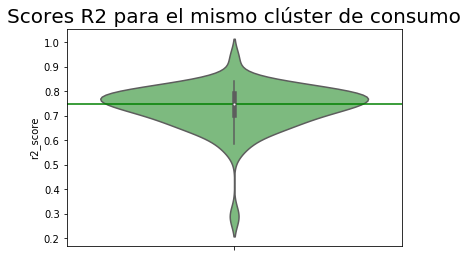

In [167]:
summary = pd.DataFrame(score_summary)

plt.figure()
g = sns.violinplot(y=summary['r2_score'], palette = 'Greens')
g.axhline(y = summary['r2_score'].median(), color = 'g')
g.set_title('Scores R2 para el mismo clúster de consumo', fontsize = 20)
plt.show()

In [162]:
summary.loc[summary['Cluster']==3, ['r2_score']].mean()

r2_score    0.734187
dtype: float64

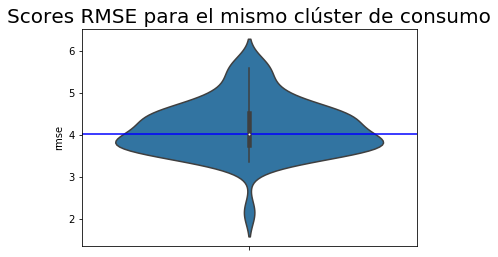

In [165]:
summary = pd.DataFrame(score_summary)

plt.figure()
g = sns.violinplot(y=summary['rmse'])
g.axhline(y = summary['rmse'].median(), color = 'b')
g.set_title('Scores RMSE para el mismo clúster de consumo', fontsize = 20)
plt.show()

In [164]:
summary.loc[summary['Cluster']==3, ['rmse']].mean()

rmse    4.167859
dtype: float64

<a id="section_compare"></a> 
### 7.3. Comparativa

[Volver](#section_toc)

El siguiente paso será evaluar la performance del modelo (entrenado en el bloque inicial), aplicándolo de manera sistemática al resto de los bloques, agrupados según su cluster de consumo.

### Cluster 1

In [296]:
cluster_mask = block_clustering['cluster'] == 1
cluster = block_clustering[cluster_mask]
list_cluster_1 = cluster['block'].values
list_cluster_1

array(['block_0', 'block_1', 'block_2'], dtype=object)

In [321]:
for i in list_cluster_1:

    ## Importamos el .csv del block seleccionado

    data_location = 'data/halfhourly_dataset/halfhourly_dataset/%s.csv' % (i)
    block_data = pd.read_csv(data_location)

    ## Realizamos las transformaciones necesarias para operar con el campo 'energy'.

    block_data['energy(kWh/hh)'] = block_data['energy(kWh/hh)'].replace(to_replace = 'Null', value = 0)
    block_data['energy(kWh/hh)'] = block_data['energy(kWh/hh)'].astype('float64')

    ## Transformamos la columna 'tstp' a datetime y generamos nuevas columnas relacionadas a la fecha

    block_data['full_datetime'] = pd.to_datetime(block_data['tstp'])
    block_data['date'] = block_data['full_datetime'].dt.date
    block_data['year'] = block_data['full_datetime'].dt.year
    block_data['month'] = block_data['full_datetime'].dt.month
    block_data['week'] = block_data['full_datetime'].dt.week
    block_data['day_name'] = block_data['full_datetime'].dt.day_name()
    block_data['time'] = block_data['full_datetime'].dt.time
    block_data['hour'] = block_data['full_datetime'].dt.hour
    block_data['minute'] = block_data['full_datetime'].dt.minute

    ## Agrupamos la información para que quede en energía por hora (los .csv tiene registros cada media hora)

    block_data_hourly = block_data.groupby(['LCLid', 'date', 'year', 'month', 'week', 'day_name', 'hour'])['energy(kWh/hh)'].sum()
    block_data_hourly = block_data_hourly.reset_index()

    ## Unimos el dataset sobre consumo de energía con los datos específicos de cada suministro

    df_block = block_data_hourly.merge(info_df, on = 'LCLid', how = 'left')

    ## Unimos el dataset resultante con el que contiene variables climáticas

    df_block_full = df_block.merge(weather, on = ['date', 'hour'], how = 'left')

    ## Unimos el dataset resultante con el listado de feriados, creando una dummie ('is_holiday') con valor 1 para los feriados.

    df_block_full['is_holiday'] = df_block_full['full_datetime'].isin(holidays['full_datetime'])

    ## Limpiamos el resultado final, completando faltantes de clima y eliminando columnas redundantes

    df_block_full = df_block_full.sort_values(by = ['LCLid', 'date', 'year_x', 'month_x', 'week_x', 'day_name_x', 'hour'], ascending = True)
    df_block_full = df_block_full.fillna(axis = 0, method = 'bfill')
    df_block_full = df_block_full.drop(columns = ['date', 'full_datetime', 'year_y', 'month_y', 'week_y', 'day_name_y', 'minute', 'time', 'icon'])
    df_block_full = df_block_full.rename(mapper = {'energy(kWh/hh)' : 'energy', 'year_x' : 'year', 'month_x' : 'month', 'week_x' : 'week', 'day_name_x' : 'day_name'}, axis = 1)
    df_block_full['year'] = df_block_full['year'].astype('object')
    df_block_full['month'] = df_block_full['month'].astype('object')
    df_block_full['week'] = df_block_full['week'].astype('object')
    df_block_full['hour'] = df_block_full['hour'].astype('object')

    year_mask = df_block_full['year'] >= 2013
    df_block_full = df_block_full[year_mask]

    df_block_summary = df_block_full.groupby(['block', 'year', 'month', 'week', 'day_name', 'hour',
                                              'visibility','windBearing',
                                              'temperature', 'dewPoint', 'pressure', 'apparentTemperature',
                                              'windSpeed', 'precipType', 'humidity', 'summary', 'is_holiday'])['energy'].sum()
    df_block_summary = df_block_summary.reset_index()
    df_block_summary['is_holiday'] = df_block_summary['is_holiday'].astype('category')
    df_block_summary = df_block_summary.drop(columns = 'block')

    X_test_3 = df_block_summary.drop(columns = 'energy')
    y_test_3 = df_block_summary['energy']

    X_test_3_categorical = X_test_3[categorical]
    X_test_3_categorical = pd.DataFrame(encoder.transform(X_test_3_categorical), columns = encoder.get_feature_names(categorical))

    X_test_3_numerical = X_test_3[numerical]
    X_test_3_numerical = pd.DataFrame(scaler.transform(X_test_3_numerical), columns = X_test_numerical.columns)

    X_test_3 = pd.concat([X_test_3_categorical, X_test_3_numerical], axis = 1)
    
    y_pred = cat.predict(X_test_3)
    
    score = r2_score(y_test_3, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test_3, y_pred))

    score_summary.append({'block' : i,
                          'r2_score' : score,
                          'rmse' : rmse,
                          'Cluster' : 1})
    
    print('Predicción del', i, 'completa')
print('----------------------------------------')
print('Todas las predicciones fueron realizadas')

Predicción del block_0 completa
Predicción del block_1 completa
Predicción del block_2 completa
----------------------------------------
Todas las predicciones fueron realizadas


### Cluster 2

In [322]:
cluster_mask = block_clustering['cluster'] == 2
cluster = block_clustering[cluster_mask]
list_cluster_2 = cluster['block'].values
list_cluster_2

array(['block_10', 'block_11', 'block_111', 'block_12', 'block_14',
       'block_24', 'block_28', 'block_29', 'block_3', 'block_30',
       'block_34', 'block_5', 'block_6', 'block_66', 'block_68',
       'block_7', 'block_73', 'block_8', 'block_9'], dtype=object)

In [323]:
for i in list_cluster_2:

    ## Importamos el .csv del block seleccionado

    data_location = 'data/halfhourly_dataset/halfhourly_dataset/%s.csv' % (i)
    block_data = pd.read_csv(data_location)

    ## Realizamos las transformaciones necesarias para operar con el campo 'energy'.

    block_data['energy(kWh/hh)'] = block_data['energy(kWh/hh)'].replace(to_replace = 'Null', value = 0)
    block_data['energy(kWh/hh)'] = block_data['energy(kWh/hh)'].astype('float64')

    ## Transformamos la columna 'tstp' a datetime y generamos nuevas columnas relacionadas a la fecha

    block_data['full_datetime'] = pd.to_datetime(block_data['tstp'])
    block_data['date'] = block_data['full_datetime'].dt.date
    block_data['year'] = block_data['full_datetime'].dt.year
    block_data['month'] = block_data['full_datetime'].dt.month
    block_data['week'] = block_data['full_datetime'].dt.week
    block_data['day_name'] = block_data['full_datetime'].dt.day_name()
    block_data['time'] = block_data['full_datetime'].dt.time
    block_data['hour'] = block_data['full_datetime'].dt.hour
    block_data['minute'] = block_data['full_datetime'].dt.minute

    ## Agrupamos la información para que quede en energía por hora (los .csv tiene registros cada media hora)

    block_data_hourly = block_data.groupby(['LCLid', 'date', 'year', 'month', 'week', 'day_name', 'hour'])['energy(kWh/hh)'].sum()
    block_data_hourly = block_data_hourly.reset_index()

    ## Unimos el dataset sobre consumo de energía con los datos específicos de cada suministro

    df_block = block_data_hourly.merge(info_df, on = 'LCLid', how = 'left')

    ## Unimos el dataset resultante con el que contiene variables climáticas

    df_block_full = df_block.merge(weather, on = ['date', 'hour'], how = 'left')

    ## Unimos el dataset resultante con el listado de feriados, creando una dummie ('is_holiday') con valor 1 para los feriados.

    df_block_full['is_holiday'] = df_block_full['full_datetime'].isin(holidays['full_datetime'])

    ## Limpiamos el resultado final, completando faltantes de clima y eliminando columnas redundantes

    df_block_full = df_block_full.sort_values(by = ['LCLid', 'date', 'year_x', 'month_x', 'week_x', 'day_name_x', 'hour'], ascending = True)
    df_block_full = df_block_full.fillna(axis = 0, method = 'bfill')
    df_block_full = df_block_full.drop(columns = ['date', 'full_datetime', 'year_y', 'month_y', 'week_y', 'day_name_y', 'minute', 'time', 'icon'])
    df_block_full = df_block_full.rename(mapper = {'energy(kWh/hh)' : 'energy', 'year_x' : 'year', 'month_x' : 'month', 'week_x' : 'week', 'day_name_x' : 'day_name'}, axis = 1)
    df_block_full['year'] = df_block_full['year'].astype('object')
    df_block_full['month'] = df_block_full['month'].astype('object')
    df_block_full['week'] = df_block_full['week'].astype('object')
    df_block_full['hour'] = df_block_full['hour'].astype('object')

    year_mask = df_block_full['year'] >= 2013
    df_block_full = df_block_full[year_mask]

    df_block_summary = df_block_full.groupby(['block', 'year', 'month', 'week', 'day_name', 'hour',
                                              'visibility','windBearing',
                                              'temperature', 'dewPoint', 'pressure', 'apparentTemperature',
                                              'windSpeed', 'precipType', 'humidity', 'summary', 'is_holiday'])['energy'].sum()
    df_block_summary = df_block_summary.reset_index()
    df_block_summary['is_holiday'] = df_block_summary['is_holiday'].astype('category')
    df_block_summary = df_block_summary.drop(columns = 'block')

    X_test_3 = df_block_summary.drop(columns = 'energy')
    y_test_3 = df_block_summary['energy']

    X_test_3_categorical = X_test_3[categorical]
    X_test_3_categorical = pd.DataFrame(encoder.transform(X_test_3_categorical), columns = encoder.get_feature_names(categorical))

    X_test_3_numerical = X_test_3[numerical]
    X_test_3_numerical = pd.DataFrame(scaler.transform(X_test_3_numerical), columns = X_test_numerical.columns)

    X_test_3 = pd.concat([X_test_3_categorical, X_test_3_numerical], axis = 1)
    
    y_pred = cat.predict(X_test_3)
    
    score = r2_score(y_test_3, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test_3, y_pred))

    score_summary.append({'block' : i,
                          'r2_score' : score,
                          'rmse' : rmse,
                          'Cluster' : 2})
    
    print('Predicción del', i, 'completa')
print('----------------------------------------')
print('Todas las predicciones fueron realizadas')

Predicción del block_10 completa
Predicción del block_11 completa
Predicción del block_111 completa
Predicción del block_12 completa
Predicción del block_14 completa
Predicción del block_24 completa
Predicción del block_28 completa
Predicción del block_29 completa
Predicción del block_3 completa
Predicción del block_30 completa
Predicción del block_34 completa
Predicción del block_5 completa
Predicción del block_6 completa
Predicción del block_66 completa
Predicción del block_68 completa
Predicción del block_7 completa
Predicción del block_73 completa
Predicción del block_8 completa
Predicción del block_9 completa
----------------------------------------
Todas las predicciones fueron realizadas


### Cluster 4

In [324]:
cluster_mask = block_clustering['cluster'] == 4
cluster = block_clustering[cluster_mask]
list_cluster_4 = cluster['block'].values
list_cluster_4

array(['block_100', 'block_101', 'block_102', 'block_103', 'block_105',
       'block_106', 'block_107', 'block_108', 'block_109', 'block_21',
       'block_32', 'block_43', 'block_44', 'block_45', 'block_46',
       'block_47', 'block_50', 'block_52', 'block_53', 'block_55',
       'block_56', 'block_64', 'block_78', 'block_86', 'block_87',
       'block_90', 'block_91', 'block_92', 'block_93', 'block_94',
       'block_95', 'block_96', 'block_97', 'block_98', 'block_99'],
      dtype=object)

In [325]:
for i in list_cluster_4:

    ## Importamos el .csv del block seleccionado

    data_location = 'data/halfhourly_dataset/halfhourly_dataset/%s.csv' % (i)
    block_data = pd.read_csv(data_location)

    ## Realizamos las transformaciones necesarias para operar con el campo 'energy'.

    block_data['energy(kWh/hh)'] = block_data['energy(kWh/hh)'].replace(to_replace = 'Null', value = 0)
    block_data['energy(kWh/hh)'] = block_data['energy(kWh/hh)'].astype('float64')

    ## Transformamos la columna 'tstp' a datetime y generamos nuevas columnas relacionadas a la fecha

    block_data['full_datetime'] = pd.to_datetime(block_data['tstp'])
    block_data['date'] = block_data['full_datetime'].dt.date
    block_data['year'] = block_data['full_datetime'].dt.year
    block_data['month'] = block_data['full_datetime'].dt.month
    block_data['week'] = block_data['full_datetime'].dt.week
    block_data['day_name'] = block_data['full_datetime'].dt.day_name()
    block_data['time'] = block_data['full_datetime'].dt.time
    block_data['hour'] = block_data['full_datetime'].dt.hour
    block_data['minute'] = block_data['full_datetime'].dt.minute

    ## Agrupamos la información para que quede en energía por hora (los .csv tiene registros cada media hora)

    block_data_hourly = block_data.groupby(['LCLid', 'date', 'year', 'month', 'week', 'day_name', 'hour'])['energy(kWh/hh)'].sum()
    block_data_hourly = block_data_hourly.reset_index()

    ## Unimos el dataset sobre consumo de energía con los datos específicos de cada suministro

    df_block = block_data_hourly.merge(info_df, on = 'LCLid', how = 'left')

    ## Unimos el dataset resultante con el que contiene variables climáticas

    df_block_full = df_block.merge(weather, on = ['date', 'hour'], how = 'left')

    ## Unimos el dataset resultante con el listado de feriados, creando una dummie ('is_holiday') con valor 1 para los feriados.

    df_block_full['is_holiday'] = df_block_full['full_datetime'].isin(holidays['full_datetime'])

    ## Limpiamos el resultado final, completando faltantes de clima y eliminando columnas redundantes

    df_block_full = df_block_full.sort_values(by = ['LCLid', 'date', 'year_x', 'month_x', 'week_x', 'day_name_x', 'hour'], ascending = True)
    df_block_full = df_block_full.fillna(axis = 0, method = 'bfill')
    df_block_full = df_block_full.drop(columns = ['date', 'full_datetime', 'year_y', 'month_y', 'week_y', 'day_name_y', 'minute', 'time', 'icon'])
    df_block_full = df_block_full.rename(mapper = {'energy(kWh/hh)' : 'energy', 'year_x' : 'year', 'month_x' : 'month', 'week_x' : 'week', 'day_name_x' : 'day_name'}, axis = 1)
    df_block_full['year'] = df_block_full['year'].astype('object')
    df_block_full['month'] = df_block_full['month'].astype('object')
    df_block_full['week'] = df_block_full['week'].astype('object')
    df_block_full['hour'] = df_block_full['hour'].astype('object')

    year_mask = df_block_full['year'] >= 2013
    df_block_full = df_block_full[year_mask]

    df_block_summary = df_block_full.groupby(['block', 'year', 'month', 'week', 'day_name', 'hour',
                                              'visibility','windBearing',
                                              'temperature', 'dewPoint', 'pressure', 'apparentTemperature',
                                              'windSpeed', 'precipType', 'humidity', 'summary', 'is_holiday'])['energy'].sum()
    df_block_summary = df_block_summary.reset_index()
    df_block_summary['is_holiday'] = df_block_summary['is_holiday'].astype('category')
    df_block_summary = df_block_summary.drop(columns = 'block')

    X_test_3 = df_block_summary.drop(columns = 'energy')
    y_test_3 = df_block_summary['energy']

    X_test_3_categorical = X_test_3[categorical]
    X_test_3_categorical = pd.DataFrame(encoder.transform(X_test_3_categorical), columns = encoder.get_feature_names(categorical))

    X_test_3_numerical = X_test_3[numerical]
    X_test_3_numerical = pd.DataFrame(scaler.transform(X_test_3_numerical), columns = X_test_numerical.columns)

    X_test_3 = pd.concat([X_test_3_categorical, X_test_3_numerical], axis = 1)
    
    y_pred = cat.predict(X_test_3)
    
    score = r2_score(y_test_3, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test_3, y_pred))

    score_summary.append({'block' : i,
                          'r2_score' : score,
                          'rmse' : rmse,
                          'Cluster' : 4})
    
    print('Predicción del', i, 'completa')
print('----------------------------------------')
print('Todas las predicciones fueron realizadas')

Predicción del block_100 completa
Predicción del block_101 completa
Predicción del block_102 completa
Predicción del block_103 completa
Predicción del block_105 completa
Predicción del block_106 completa
Predicción del block_107 completa
Predicción del block_108 completa
Predicción del block_109 completa
Predicción del block_21 completa
Predicción del block_32 completa
Predicción del block_43 completa
Predicción del block_44 completa
Predicción del block_45 completa
Predicción del block_46 completa
Predicción del block_47 completa
Predicción del block_50 completa
Predicción del block_52 completa
Predicción del block_53 completa
Predicción del block_55 completa
Predicción del block_56 completa
Predicción del block_64 completa
Predicción del block_78 completa
Predicción del block_86 completa
Predicción del block_87 completa
Predicción del block_90 completa
Predicción del block_91 completa
Predicción del block_92 completa
Predicción del block_93 completa
Predicción del block_94 completa
P

## Performance del Modelo por Cluster de Consumo

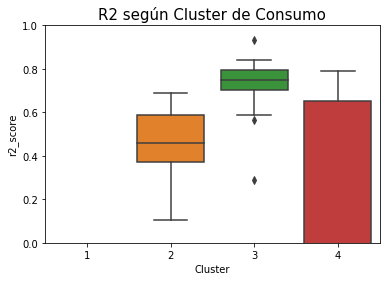

In [339]:
summary = pd.DataFrame(score_summary)

plt.figure()
g = sns.boxplot(x = summary['Cluster'], y = summary['r2_score'])
g.set_title('R2 según Cluster de Consumo', fontsize = 15)
g.set_ylim([0,1])
plt.show()

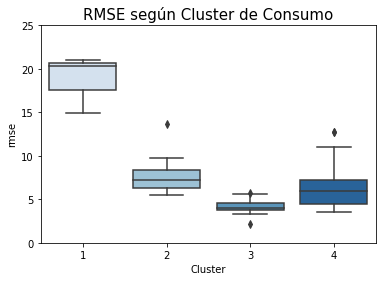

In [340]:
summary = pd.DataFrame(score_summary)

plt.figure()
g = sns.boxplot(x = summary['Cluster'], y = summary['rmse'], palette = 'Blues')
g.set_title('RMSE según Cluster de Consumo', fontsize = 15)
g.set_ylim([0,25])
plt.show()

A partir del gráfico podemos observar que la performance del modelo tiene un rendimiento positivo para blocks del mismo cluster, pero su rendimiento tiende a bajar para otros perfiles de consumo, en algunos casos de manera considerable (caso del Cluster 1, de mayor consumo).

In [327]:
cluster_count = summary.groupby('Cluster')['block'].count()
cluster_count = cluster_count.rename(index = 'block_count')
cluster_mean_r2 = summary.groupby('Cluster')['r2_score'].mean()
cluster_mean_r2 = cluster_mean_r2.rename(index = 'mean_r2')
cluster_median_r2 = summary.groupby('Cluster')['r2_score'].median()
cluster_median_r2 = cluster_median_r2.rename(index = 'median_r2')
cluster_min_r2 = summary.groupby('Cluster')['r2_score'].min()
cluster_min_r2 = cluster_min_r2.rename(index = 'min_r2')
cluster_max_r2 = summary.groupby('Cluster')['r2_score'].max()
cluster_max_r2 = cluster_max_r2.rename(index = 'max_r2')
cluster_mean_rmse = summary.groupby('Cluster')['rmse'].mean()
cluster_mean_rmse = cluster_mean_rmse.rename(index = 'mean_rmse')
cluster_median_rmse = summary.groupby('Cluster')['rmse'].median()
cluster_median_rmse = cluster_median_rmse.rename(index = 'median_rmse')
cluster_min_rmse = summary.groupby('Cluster')['rmse'].min()
cluster_min_rmse = cluster_min_rmse.rename(index = 'min_rmse')
cluster_max_rmse = summary.groupby('Cluster')['rmse'].max()
cluster_max_rmse = cluster_max_rmse.rename(index = 'max_rmse')
cluster_summary = pd.concat([cluster_count, cluster_mean_r2, cluster_median_r2, cluster_min_r2, cluster_max_r2, 
                             cluster_mean_rmse, cluster_median_rmse, cluster_min_rmse, cluster_max_rmse], axis = 1)
cluster_summary = cluster_summary.reset_index()
cluster_summary

,Cluster,block_count,mean_r2,median_r2,min_r2,max_r2,mean_rmse,median_rmse,min_rmse,max_rmse
0,1,6,-0.633648,-0.645501,-1.036226,-0.219217,18.747816,20.272607,14.975018,20.995823
1,2,38,-0.192190,0.458300,-12.427396,0.686862,7.629487,7.262220,5.553149,13.675687
2,3,55,0.734187,0.748854,0.290278,0.932391,4.167859,4.033405,2.159575,5.719192
3,4,105,-0.540724,-0.020830,-6.077014,0.788802,6.251884,5.999216,3.548855,12.759930


In [328]:
summary

,block,r2_score,rmse,Cluster
0,block_104,0.644663,4.444375,3
1,block_110,0.585942,5.152572,3
2,block_13,0.785028,3.804422,3
3,block_15,0.733055,4.440593,3
4,block_16,0.932391,2.159575,3
...,...,...,...,...
199,block_95,-0.079526,6.395888,4
200,block_96,-2.094244,8.233967,4
201,block_97,-0.679242,7.018991,4
202,block_98,-1.083712,7.035144,4


In [329]:
summary['r2_score'].mean()

-0.13480808517361376

In [341]:
summary['rmse'].mean()

5.905223205961007

In [343]:
summary['rmse'].median()

5.005104144396201

Con un resumen de los resultados, podemos ver que el modelo puede ser aplicable a ciertos blocks de otros clusters(ver valores máximos para cluster 1 y cluster 3), logrando un desempeño aceptable. Del análisis previo de Clusters se observa que estos tres agrupamientos no son tan disímiles entre sí, cómo si lo es el cluster 1.

<a id="section_lime"></a> 

# <font color='skyblue'>8. BONUS TRACK: Interpretabilidad del Modelo - LIME</font>

[Volver](#section_toc)

Aplicaremos LIME para ofrecer una mayor interpretabilidad al modelo seleccionado.

In [330]:
X_train_explainer = np.array(X_train)

explainer = LimeTabularExplainer(X_train_explainer, 
                                 feature_names=X_train.columns,
                                 class_names=['energy'],
                                 categorical_features = categorical,
                                 verbose=True,
                                 mode='regression')

In [331]:
i = 10
data_row = np.array(X_test.iloc[i])
print('Fila seleccionada: ', i)
print('Valor verdadero: ', y_test.iloc[i])
exp = explainer.explain_instance(data_row, cat.predict, num_features=10)

Fila seleccionada:  10
Valor verdadero:  29.697999999999993
Intercept 42.995820082400755
Prediction_local [23.99058728]
Right: 31.76280745808161


In [332]:
exp.show_in_notebook(show_table=True)

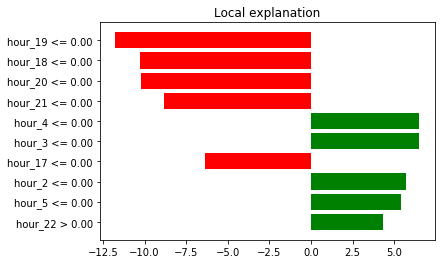

In [333]:
exp.as_pyplot_figure();